## Set up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib_venn import venn2

# check the current working directory
current_working_directory = Path.cwd()
print(current_working_directory)

/Users/elaine/Documents/MRes Project 2/Final deliverables/retrieval_vs_freezing/RNAscope_analysis/TRAP(freezing)-specific code


In [2]:
brain_id = 'JKAY22.3d'
order = None
global_indices = None
slice_names_to_skip = []

In [4]:
cell_type_directories = ['DAPIcells_alsoTRAPed', 'DAPIcells_alsoCfos', 'DAPIcells_alsoVgat', 'DAPIcells_alsoVglut', 'Vgat_alsoTRAPed', 'Vgat_alsoCfos', 'Vglut_alsoTRAPed', 'Vglut_alsoCfos', 'TRAPed_alsoVgat', 'TRAPed_alsoVglut', 'Cfos_alsoVgat', 'Cfos_alsoVglut', 'TRAPed_alsoCfos', 'Cfos_alsoTRAPed']
column_colors = ['lime', 'orange', 'yellow', 'red', 'royalblue', 'navy', 'gold', 'darkkhaki', 'darkcyan', 'darkgoldenrod', 'paleturquoise', 'bisque', 'purple', 'pink']

# get name of all images/slices
# # all slices
slice_names = [f.stem for f in Path().glob(f'registered/{brain_id}_reg/annotation_results/DAPIcells_alsoTRAPed/*.ome.tif.csv')]
slice_names.sort()
print('Alphabetically sorted: ')
print('\n'.join(slice_names))
# reorder slices to be anterior-to-posterior
# EXCLUDE SLICES
if brain_id == 'JKAY22.3d':
    order = [1, 0, 6, 5, 4, 7, 3, 2, 8, 13, 11, 10, 9, 12]
    slice_names = [slice_names[i] for i in order]
    slice_names = slice_names[:-1] # for 22.3d only
    global_indices = [2, 3, 4, 4, 5, 6, 7, 8, 9, 9, 10, 11, 12]
elif brain_id == 'JKAY22.3e':
    order = [3, 0, 2, 1, 5, 4, 7, 10, 8, 11, 6, 9, 13, 14, 12, 15, 16, 17, 18, 19]
    slice_names = [slice_names[i] for i in order]
    slice_names = slice_names[:-4] # for 22.3e only
    slice_names_to_skip = ['JKAY22.3e_3_Scan2_[5442,31195]_component_data_merged_Region 1.ome.tif', 'JKAY22.3e_3_Scan2_[5442,31195]_component_data_merged_Region 2.ome.tif', 'JKAY22.3e_3_Scan2_[5442,31195]_component_data_merged_Region 3.ome.tif', 'JKAY22.3e_3_Scan2_[5442,31195]_component_data_merged_Region 4.ome.tif']
    global_indices = [0, 1, 2, 2, 3, 4, 5, 6, 7, 7, 8, 9, 10, 10, 11, 12]
elif brain_id == 'JKAY22.3f':
    order = [0, 1, 3, 5, 4, 2, 6, 7, 9, 12, 11, 8, 10]
    slice_names = [slice_names[i] for i in order]
    global_indices = [2, 3, 4, 4, 5, 6, 7, 8, 9, 9, 10, 11, 12]
elif brain_id == 'JKAY22.3g':
    order = [2, 1, 3, 0, 4, 5, 8, 9, 6, 7, 10, 11, 16, 17, 15, 14, 13, 12]
    slice_names = [slice_names[i] for i in order]
    slice_names_to_skip = ['JKAY22.3g_1_Scan1_[7081,62468]_component_data_merged_Region 3.ome.tif', 'JKAY22.3g_1_Scan1_[7081,62468]_component_data_merged_Region 2.ome.tif', 'JKAY22.3g_3_Scan2_[7017,50423]_component_data_merged_Region 3.ome.tif']
    global_indices = [None, None, 0, 1, 2, 2, 3, 3, 4, 5, 6, 7, None, 8, 9, 9, 10, 11]
elif brain_id == 'JKAY22.5d':
    order = [2, 0, 3, 1, 4, 5, 6, 7, 9, 8, 10, 11, 15, 13, 14, 12, 16, 17]
    slice_names = [slice_names[i] for i in order]
    slice_names_to_skip = ['JKAY22.5d_1_Scan1_[3804,57330]_component_data_merged_Region 3.ome.tif', 'JKAY22.5d_1_Scan1_[3804,57330]_component_data_merged_Region 1.ome.tif', 'JKAY22.5d_3_Scan2_[6165,58983]_component_data_merged_Region 4.ome.tif', 'JKAY22.5d_3_Scan2_[6165,58983]_component_data_merged_Region 2.ome.tif']
    global_indices = [None, None, 0, 1, 2, 2, 3, 4, 5, 5, 6, 7, None, None, 8, 9, 10, 11]
elif brain_id == 'JKAY23.5d':
    order = [2, 5, 4, 3, 0, 1, 7, 9, 8, 6, 11, 10, 16, 18, 17, 14, 19, 15, 13, 12]
    slice_names = [slice_names[i] for i in order]
    slice_names = slice_names[:-2] # for 23.5d only
    global_indices = [0, 1, 2, 2, 3, 3, 4, 5, 6, 6, 7, 8, 9, 9, 10, 11, 11, 12]
print('Anatomically sorted: ')
print('\n'.join(slice_names))

Alphabetically sorted: 
JKAY22.3d_1_Scan1_[4323,36851]_component_data_merged_Region 1.ome.tif
JKAY22.3d_1_Scan1_[4323,36851]_component_data_merged_Region 2.ome.tif
JKAY22.3d_2_Scan1_[6792,37086]_component_data_merged_Region 1.ome.tif
JKAY22.3d_2_Scan1_[6792,37086]_component_data_merged_Region 2.ome.tif
JKAY22.3d_2_Scan1_[6881,59359]_component_data_merged_Region 1.ome.tif
JKAY22.3d_2_Scan1_[6881,59359]_component_data_merged_Region 2.ome.tif
JKAY22.3d_2_Scan1_[6881,59359]_component_data_merged_Region 3.ome.tif
JKAY22.3d_2_Scan1_[6881,59359]_component_data_merged_Region 4.ome.tif
JKAY22.3d_3_Scan1_[3751,62275]_component_data_merged_Region 1.ome.tif
JKAY22.3d_3_Scan1_[3751,62275]_component_data_merged_Region 2.ome.tif
JKAY22.3d_3_Scan1_[3751,62275]_component_data_merged_Region 3.ome.tif
JKAY22.3d_3_Scan1_[3751,62275]_component_data_merged_Region 4.ome.tif
JKAY22.3d_3_Scan1_[3751,62275]_component_data_merged_Region 5.ome.tif
JKAY22.3d_3_Scan1_[3751,62275]_component_data_merged_Region 6.ome.

## Analysis

In [5]:
annotation_dir = f"registered/{brain_id}_reg/annotation_results"
output_dir = f"registered/{brain_id}_reg/calculated_outputs"

# initialize dictionary
num_positive = {
    'Region': ['dmPAG', 'dlPAG', 'lPAG', 'vlPAG']
}
results_per_slice = {
    'Slice index': [],
    'Region': []
}
results_per_slice_revised = {
    'Slice index': [],
    'Region': []
}
vgat_vglut_per_slice = {
    'Slice index': [],
    'Region': [],
    '# Vgat': [],
    '# Vglut': [],
#     '# Vgat+Vglut': []
}

for cell_type_idx, cell_type_dir in enumerate(cell_type_directories):
    dmPAG_pos_all = []
    dlPAG_pos_all = []
    lPAG_pos_all = []
    vlPAG_pos_all = []
    
    ## TO KEEP TRACK OF DATA PER SLICE INDIVIDUALLY
    results_per_slice[f'{cell_type_dir}_numerator'] = []
    results_per_slice[f'{cell_type_dir}_denominator'] = []
    results_per_slice[f'{cell_type_dir}_percent'] = []
    results_per_slice_revised[f'{cell_type_dir}'] = []
    
    for slice_idx, slice_name in enumerate(slice_names):
#         print(cell_type_dir + ' ' + slice_name)
        if slice_name in slice_names_to_skip:
            continue
        slice_idx_string = f'Slice {slice_idx}'
        annotations_filename = f"{annotation_dir}/{cell_type_dir}/{slice_name}.csv"
        pos_detection_filename = f"{annotation_dir}/{cell_type_dir}/{slice_name}neurons.csv"

        annotations_df = pd.read_csv(annotations_filename, delimiter = '\t')
        pos_detection_df = pd.read_csv(pos_detection_filename, delimiter = '\t')
        
        if 'dmPAG' not in annotations_df['Name'].values:
#             print('NOT IN' + slice_name)
            continue
    
        if 'Num Detections' not in annotations_df.columns:
            print("Slice without 'Num Detections' column detected: " + slice_name + '; ' + cell_type_dir)
            annotations_df['Num Detections'] = 0 
            annotations_df['Num Positive'] = 0
            annotations_df['Num Negative'] = 0 
        
        # check for divide by 0 = Nan
        annotations_df.loc[annotations_df['Num Detections'] == 0, 'Positive %'] = 0.0
        
        if 'Num Positive' not in annotations_df.columns:
            print("Slice without 'Num Positive' column detected: " + slice_name + '; ' + cell_type_dir)
            # check that there were 0 positive cell detections
            if (annotations_df[annotations_df['Num Detections'] != 0]['Num Negative'] != annotations_df[annotations_df['Num Detections'] != 0]['Num Detections']).all():
                print("ERROR -- check Num Detections, Num Negative, Num Positive")
                display(annotations_df[annotations_df['Num Detections'] != 0])
                break
            annotations_df['Num Positive'] = 0 
        if 'Num Negative' not in annotations_df.columns:
            print("Slice without 'Num Negative' column detected: " + slice_name + '; ' + cell_type_dir)
            # check that there were 0 negative cell detections
            if (annotations_df[annotations_df['Num Detections'] != 0]['Num Positive'] != annotations_df[annotations_df['Num Detections'] != 0]['Num Detections']).all():
                print("ERROR -- check Num Detections, Num Negative, Num Positive")
                display(annotations_df[annotations_df['Num Detections'] != 0])
                break
            annotations_df['Num Negative'] = 0 

        columns_of_interest = ['Name', 'Class', 'Parent', 'Num Detections', 'Num Negative', 'Num Positive', 'Positive %']
        dmPAG_row = annotations_df[annotations_df['Name'] == 'dmPAG'][columns_of_interest]
        dlPAG_l_row = annotations_df[annotations_df['Name'] == 'dlPAG-l'][columns_of_interest]
        dlPAG_r_row = annotations_df[annotations_df['Name'] == 'dlPAG-r'][columns_of_interest]
        lPAG_l_row = annotations_df[annotations_df['Name'] == 'lPAG-l'][columns_of_interest]
        lPAG_r_row = annotations_df[annotations_df['Name'] == 'lPAG-r'][columns_of_interest]
        vlPAG_l_row = annotations_df[annotations_df['Name'] == 'vlPAG-l'][columns_of_interest]
        vlPAG_r_row = annotations_df[annotations_df['Name'] == 'vlPAG-r'][columns_of_interest]
        
        # record number of Vgat cells/number of Vglut + Vgat cells and Vglut cells/number of Vglut + Vgat cells 
        if cell_type_dir == 'Vgat_alsoTRAPed': 
            vgat_vglut_per_slice['Slice index'].extend([slice_idx_string for _ in range(7)])
            vgat_vglut_per_slice['Region'].extend(['dmPAG', 'dlPAG_l', 'dlPAG_r', 'lPAG_l', 'lPAG_r', 'vlPAG_l', 'vlPAG_r'])
            vgat_vglut_per_slice['# Vgat'].extend([dmPAG_row['Num Detections'].item(), dlPAG_l_row['Num Detections'].item(), dlPAG_r_row['Num Detections'].item(), lPAG_l_row['Num Detections'].item(), lPAG_r_row['Num Detections'].item(), vlPAG_l_row['Num Detections'].item(), vlPAG_r_row['Num Detections'].item()])
        if cell_type_dir == 'Vglut_alsoTRAPed':
            vgat_vglut_per_slice['# Vglut'].extend([dmPAG_row['Num Detections'].item(), dlPAG_l_row['Num Detections'].item(), dlPAG_r_row['Num Detections'].item(), lPAG_l_row['Num Detections'].item(), lPAG_r_row['Num Detections'].item(), vlPAG_l_row['Num Detections'].item(), vlPAG_r_row['Num Detections'].item()])
            if slice_idx + 1 == len(slice_names):
                vgat_vglut_per_slice = pd.DataFrame.from_dict(vgat_vglut_per_slice)
                vgat_vglut_per_slice['# Vgat+Vglut'] = vgat_vglut_per_slice['# Vgat'].add(vgat_vglut_per_slice['# Vglut'], axis=0)
                vgat_vglut_per_slice['Vgat/(Vgat+Vglut)'] = vgat_vglut_per_slice['# Vgat'].div(vgat_vglut_per_slice['# Vgat+Vglut'], axis=0)
                vgat_vglut_per_slice['Vglut/(Vgat+Vglut)'] = vgat_vglut_per_slice['# Vglut'].div(vgat_vglut_per_slice['# Vgat+Vglut'], axis=0)

        dmPAG_revised = round(dmPAG_row['Positive %'].item(), 2)
        dlPAG_revised = round((dlPAG_l_row['Positive %'].item() + dlPAG_r_row['Positive %'].item()) / 2, 2)
        lPAG_revised = round((lPAG_l_row['Positive %'].item() + lPAG_r_row['Positive %'].item()) / 2, 2)
        vlPAG_revised = round((vlPAG_l_row['Positive %'].item() + vlPAG_r_row['Positive %'].item()) / 2, 2)
        dmPAG_pos = dmPAG_row['Num Positive'].item()
        dlPAG_l_pos = dlPAG_l_row['Num Positive'].item()
        dlPAG_r_pos = dlPAG_r_row['Num Positive'].item()
        lPAG_l_pos = lPAG_l_row['Num Positive'].item()
        lPAG_r_pos = lPAG_r_row['Num Positive'].item()
        vlPAG_l_pos = vlPAG_l_row['Num Positive'].item()
        vlPAG_r_pos = vlPAG_r_row['Num Positive'].item()
        dmPAG_denom = dmPAG_row['Num Detections'].item()
        dlPAG_l_denom = dlPAG_l_row['Num Detections'].item()
        dlPAG_r_denom = dlPAG_r_row['Num Detections'].item()
        lPAG_l_denom = lPAG_l_row['Num Detections'].item()
        lPAG_r_denom = lPAG_r_row['Num Detections'].item()
        vlPAG_l_denom = vlPAG_l_row['Num Detections'].item()
        vlPAG_r_denom = vlPAG_r_row['Num Detections'].item()
        dmPAG_percent = dmPAG_row['Positive %'].item()
        dlPAG_l_percent = dlPAG_l_row['Positive %'].item()
        dlPAG_r_percent = dlPAG_r_row['Positive %'].item()
        lPAG_l_percent = lPAG_l_row['Positive %'].item()
        lPAG_r_percent = lPAG_r_row['Positive %'].item()
        vlPAG_l_percent = vlPAG_l_row['Positive %'].item()
        vlPAG_r_percent = vlPAG_r_row['Positive %'].item()
        
        # record data per slice individually
        if cell_type_idx == 0:
            results_per_slice['Slice index'].extend([slice_idx_string for _ in range(7)])
            results_per_slice['Region'].extend(['dmPAG', 'dlPAG_l', 'dlPAG_r', 'lPAG_l', 'lPAG_r', 'vlPAG_l', 'vlPAG_r'])
            results_per_slice_revised['Slice index'].extend([slice_idx_string for _ in range(4)])
            results_per_slice_revised['Region'].extend(['dmPAG', 'dlPAG', 'lPAG', 'vlPAG'])        
        results_per_slice[f'{cell_type_dir}_numerator'].extend([dmPAG_pos, dlPAG_l_pos, dlPAG_r_pos, lPAG_l_pos, lPAG_r_pos, vlPAG_l_pos, vlPAG_r_pos])
        results_per_slice[f'{cell_type_dir}_denominator'].extend([dmPAG_denom, dlPAG_l_denom, dlPAG_r_denom, lPAG_l_denom, lPAG_r_denom, vlPAG_l_denom, vlPAG_r_denom])
        results_per_slice[f'{cell_type_dir}_percent'].extend([dmPAG_percent, dlPAG_l_percent, dlPAG_r_percent, lPAG_l_percent, lPAG_r_percent, vlPAG_l_percent, vlPAG_r_percent])
        results_per_slice_revised[f'{cell_type_dir}'].extend([dmPAG_revised, dlPAG_revised, lPAG_revised, vlPAG_revised])

results_per_slice_df = pd.DataFrame.from_dict(results_per_slice)
print(results_per_slice_df.shape)
display(results_per_slice_df)

results_per_slice_df_revised = pd.DataFrame.from_dict(results_per_slice_revised)
print(results_per_slice_df_revised.shape)
display(results_per_slice_df_revised)

# fix vgat/vglut datatable 
# display(vgat_vglut_per_slice)
vgat_vglut_per_slice_revised = {
    'Slice index': [],
    'Region': [],
    'Vgat/(Vgat+Vglut)': [],
    'Vglut/(Vgat+Vglut)': []
}
for slice_idx, slice_name in enumerate(slice_names):
    if slice_name in slice_names_to_skip:
        continue
    slice_idx_string = f'Slice {slice_idx}'
    curr_slice = vgat_vglut_per_slice[vgat_vglut_per_slice['Slice index'] == slice_idx_string]
    
    dmPAG_rows = curr_slice[curr_slice['Region'].isin(['dmPAG'])]
    dlPAG_rows = curr_slice[curr_slice['Region'].isin(['dlPAG_l', 'dlPAG_r'])]
    lPAG_rows = curr_slice[curr_slice['Region'].isin(['lPAG_l', 'lPAG_r'])]
    vlPAG_rows = curr_slice[curr_slice['Region'].isin(['vlPAG_l', 'vlPAG_r'])]
    
    vgat_vglut_per_slice_revised['Slice index'].extend([slice_idx_string for _ in range(4)])
    vgat_vglut_per_slice_revised['Region'].extend(['dmPAG', 'dlPAG', 'lPAG', 'vlPAG'])
    vgat_vglut_per_slice_revised['Vgat/(Vgat+Vglut)'].extend([
        dmPAG_rows['Vgat/(Vgat+Vglut)'].mean(), 
        dlPAG_rows['Vgat/(Vgat+Vglut)'].mean(), 
        lPAG_rows['Vgat/(Vgat+Vglut)'].mean(), 
        vlPAG_rows['Vgat/(Vgat+Vglut)'].mean()])
    vgat_vglut_per_slice_revised['Vglut/(Vgat+Vglut)'].extend([
        dmPAG_rows['Vglut/(Vgat+Vglut)'].mean(), 
        dlPAG_rows['Vglut/(Vgat+Vglut)'].mean(), 
        lPAG_rows['Vglut/(Vgat+Vglut)'].mean(), 
        vlPAG_rows['Vglut/(Vgat+Vglut)'].mean()])
vgat_vglut_per_slice_revised = pd.DataFrame.from_dict(vgat_vglut_per_slice_revised)
vgat_vglut_per_slice_revised['Vgat/(Vgat+Vglut)'] = vgat_vglut_per_slice_revised['Vgat/(Vgat+Vglut)'] * 100
vgat_vglut_per_slice_revised['Vglut/(Vgat+Vglut)'] = vgat_vglut_per_slice_revised['Vglut/(Vgat+Vglut)'] * 100
vgat_vglut_per_slice['Vgat/(Vgat+Vglut)'] = vgat_vglut_per_slice['Vgat/(Vgat+Vglut)'] * 100
vgat_vglut_per_slice['Vglut/(Vgat+Vglut)'] = vgat_vglut_per_slice['Vglut/(Vgat+Vglut)'] * 100
display(vgat_vglut_per_slice_revised)

(91, 44)


,Slice index,Region,DAPIcells_alsoTRAPed_numerator,DAPIcells_alsoTRAPed_denominator,DAPIcells_alsoTRAPed_percent,DAPIcells_alsoCfos_numerator,DAPIcells_alsoCfos_denominator,DAPIcells_alsoCfos_percent,DAPIcells_alsoVgat_numerator,DAPIcells_alsoVgat_denominator,...,Cfos_alsoVgat_percent,Cfos_alsoVglut_numerator,Cfos_alsoVglut_denominator,Cfos_alsoVglut_percent,TRAPed_alsoCfos_numerator,TRAPed_alsoCfos_denominator,TRAPed_alsoCfos_percent,Cfos_alsoTRAPed_numerator,Cfos_alsoTRAPed_denominator,Cfos_alsoTRAPed_percent
0,Slice 0,dmPAG,12,1015,1.1820,141,1015,13.890,115,1015,...,30.700,80,114,70.18,10,18,55.56,6,114,5.263
1,Slice 0,dlPAG_l,5,466,1.0730,57,466,12.230,26,466,...,0.000,40,47,85.11,5,9,55.56,6,47,12.770
2,Slice 0,dlPAG_r,4,505,0.7921,80,505,15.840,31,505,...,7.018,51,57,89.47,4,5,80.00,4,57,7.018
3,Slice 0,lPAG_l,10,590,1.6950,137,590,23.220,14,590,...,4.348,101,115,87.83,13,15,86.67,17,115,14.780
4,Slice 0,lPAG_r,21,695,3.0220,161,695,23.170,35,695,...,8.029,120,137,87.59,17,24,70.83,21,137,15.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,Slice 12,dlPAG_r,26,764,3.4030,43,764,5.628,56,764,...,22.860,27,35,77.14,3,23,13.04,3,35,8.571
87,Slice 12,lPAG_l,152,1127,13.4900,39,1127,3.461,200,1127,...,25.930,18,27,66.67,23,142,16.20,10,27,37.040
88,Slice 12,lPAG_r,8,774,1.0340,38,774,4.910,116,774,...,20.690,13,29,44.83,5,13,38.46,5,29,17.240
89,Slice 12,vlPAG_l,120,712,16.8500,148,712,20.790,104,712,...,25.230,69,111,62.16,69,153,45.10,45,111,40.540


(52, 16)


,Slice index,Region,DAPIcells_alsoTRAPed,DAPIcells_alsoCfos,DAPIcells_alsoVgat,DAPIcells_alsoVglut,Vgat_alsoTRAPed,Vgat_alsoCfos,Vglut_alsoTRAPed,Vglut_alsoCfos,TRAPed_alsoVgat,TRAPed_alsoVglut,Cfos_alsoVgat,Cfos_alsoVglut,TRAPed_alsoCfos,Cfos_alsoTRAPed
0,Slice 0,dmPAG,1.18,13.89,11.33,47.68,1.12,25.84,4.08,24.23,5.56,94.44,30.70,70.18,55.56,5.26
1,Slice 0,dlPAG,0.93,14.04,5.86,54.11,0.00,7.85,2.12,25.57,0.00,100.00,3.51,87.29,67.78,9.89
2,Slice 0,lPAG,2.36,23.20,3.70,54.55,0.00,44.01,6.96,40.19,0.00,100.00,6.19,87.71,78.75,15.05
3,Slice 0,vlPAG,2.09,21.79,19.63,35.06,2.36,27.05,8.21,46.95,11.08,86.55,21.67,69.93,72.88,17.19
4,Slice 1,dmPAG,1.28,13.10,7.98,44.14,0.00,28.77,10.17,23.08,0.00,100.00,20.00,64.71,73.33,12.94
5,Slice 1,dlPAG,2.73,11.91,7.57,50.34,1.56,21.12,7.91,22.15,6.67,89.77,16.19,77.14,51.43,19.05
6,Slice 1,lPAG,3.89,24.37,3.79,55.02,2.17,44.61,12.70,47.08,4.65,96.51,4.23,89.28,82.70,28.19
7,Slice 1,vlPAG,6.05,28.30,14.85,38.75,5.13,39.66,18.46,57.15,6.40,85.54,17.79,66.17,73.82,21.27
8,Slice 2,dmPAG,3.43,9.29,8.85,36.62,0.00,30.67,8.33,15.62,6.25,81.25,28.21,44.87,15.62,5.13
9,Slice 2,dlPAG,4.16,6.38,9.06,38.77,0.00,22.22,9.26,15.60,0.00,91.66,13.43,75.00,28.41,14.12


,Slice index,Region,Vgat/(Vgat+Vglut),Vglut/(Vgat+Vglut)
0,Slice 0,dmPAG,18.503119,81.496881
1,Slice 0,dlPAG,10.571766,89.428234
2,Slice 0,lPAG,6.599838,93.400162
3,Slice 0,vlPAG,35.981579,64.018421
4,Slice 1,dmPAG,15.336134,84.663866
5,Slice 1,dlPAG,13.511555,86.488445
6,Slice 1,lPAG,6.459030,93.540970
7,Slice 1,vlPAG,28.070812,71.929188
8,Slice 2,dmPAG,20.661157,79.338843
9,Slice 2,dlPAG,16.657599,83.342401


In [6]:
# find pooled average
results_per_slice_df_avg = {
    'Region': ['dmPAG', 'dlPAG', 'lPAG', 'vlPAG']
}
for cell_type_idx, cell_type_dir in enumerate(cell_type_directories):
    pooled = results_per_slice_df.groupby('Region')[[f'{cell_type_dir}_numerator', f'{cell_type_dir}_denominator']].sum()
    pooled[f'{cell_type_dir}_percent'] = pooled[f'{cell_type_dir}_numerator'] / pooled[f'{cell_type_dir}_denominator'] * 100
    dmPAG = round(pooled.loc['dmPAG'][f'{cell_type_dir}_percent'].item(), 2)
    dlPAG = round((pooled.loc['dlPAG_l'][f'{cell_type_dir}_percent'].item() + pooled.loc['dlPAG_r'][f'{cell_type_dir}_percent'].item())/2, 2)
    lPAG = round((pooled.loc['lPAG_l'][f'{cell_type_dir}_percent'].item() + pooled.loc['lPAG_r'][f'{cell_type_dir}_percent'].item())/2, 2)
    vlPAG = round((pooled.loc['vlPAG_l'][f'{cell_type_dir}_percent'].item() + pooled.loc['vlPAG_r'][f'{cell_type_dir}_percent'].item())/2, 2)
    results_per_slice_df_avg[f'{cell_type_dir}'] = [dmPAG, dlPAG, lPAG, vlPAG]
    
results_per_slice_df_avg = pd.DataFrame.from_dict(results_per_slice_df_avg)
display(results_per_slice_df_avg)

,Region,DAPIcells_alsoTRAPed,DAPIcells_alsoCfos,DAPIcells_alsoVgat,DAPIcells_alsoVglut,Vgat_alsoTRAPed,Vgat_alsoCfos,Vglut_alsoTRAPed,Vglut_alsoCfos,TRAPed_alsoVgat,TRAPed_alsoVglut,Cfos_alsoVgat,Cfos_alsoVglut,TRAPed_alsoCfos,Cfos_alsoTRAPed
0,dmPAG,19.42,7.77,7.28,43.65,14.06,21.68,37.42,13.90,5.05,80.61,22.75,62.15,20.12,30.30
1,dlPAG,26.77,9.97,6.49,44.13,23.46,18.24,48.62,19.15,5.96,78.92,11.96,72.85,27.85,55.97
2,lPAG,29.47,14.76,6.73,38.25,37.29,19.29,53.23,31.92,8.40,68.30,7.84,74.15,37.72,61.26
3,vlPAG,35.49,19.37,14.30,27.18,58.48,33.54,58.97,40.53,22.88,45.85,23.23,51.08,43.85,67.27


In [7]:
DAPI_columns = {
    'title': "Positive cell detection overview - DAPI-based",
    'columns': ['DAPIcells_alsoTRAPed', 'DAPIcells_alsoCfos', 'DAPIcells_alsoVgat', 'DAPIcells_alsoVglut']
}
Vgat_columns = {
    'title': "Positive cell detection - Vgat-based",
    'columns': ['Vgat_alsoTRAPed', 'TRAPed_alsoVgat', 'Vgat_alsoCfos', 'Cfos_alsoVgat']
}
Vglut_columns = {
    'title': "Positive cell detection - Vglut-based",
    'columns': ['Vglut_alsoTRAPed', 'TRAPed_alsoVglut', 'Vglut_alsoCfos', 'Cfos_alsoVglut']
}
TRAP_cfos_columns = {
    'title': "Positive cell detection - TRAP/cfos",
    'columns': ['TRAPed_alsoCfos', 'Cfos_alsoTRAPed']
}

column_groups = [DAPI_columns, Vgat_columns, Vglut_columns, TRAP_cfos_columns]
regions = ['dmPAG', 'dlPAG', 'lPAG', 'vlPAG']

## Plot results

### Individual brain slices (anterior to posterior)

['DAPIcells_alsoTRAPed', 'DAPIcells_alsoCfos', 'DAPIcells_alsoVgat', 'DAPIcells_alsoVglut'] dmPAG
['Vgat_alsoTRAPed', 'TRAPed_alsoVgat', 'Vgat_alsoCfos', 'Cfos_alsoVgat'] dmPAG
['Vglut_alsoTRAPed', 'TRAPed_alsoVglut', 'Vglut_alsoCfos', 'Cfos_alsoVglut'] dmPAG
['TRAPed_alsoCfos', 'Cfos_alsoTRAPed'] dmPAG
['DAPIcells_alsoTRAPed', 'DAPIcells_alsoCfos', 'DAPIcells_alsoVgat', 'DAPIcells_alsoVglut'] dlPAG
['Vgat_alsoTRAPed', 'TRAPed_alsoVgat', 'Vgat_alsoCfos', 'Cfos_alsoVgat'] dlPAG
['Vglut_alsoTRAPed', 'TRAPed_alsoVglut', 'Vglut_alsoCfos', 'Cfos_alsoVglut'] dlPAG
['TRAPed_alsoCfos', 'Cfos_alsoTRAPed'] dlPAG
['DAPIcells_alsoTRAPed', 'DAPIcells_alsoCfos', 'DAPIcells_alsoVgat', 'DAPIcells_alsoVglut'] lPAG
['Vgat_alsoTRAPed', 'TRAPed_alsoVgat', 'Vgat_alsoCfos', 'Cfos_alsoVgat'] lPAG
['Vglut_alsoTRAPed', 'TRAPed_alsoVglut', 'Vglut_alsoCfos', 'Cfos_alsoVglut'] lPAG
['TRAPed_alsoCfos', 'Cfos_alsoTRAPed'] lPAG
['DAPIcells_alsoTRAPed', 'DAPIcells_alsoCfos', 'DAPIcells_alsoVgat', 'DAPIcells_alsoVglut

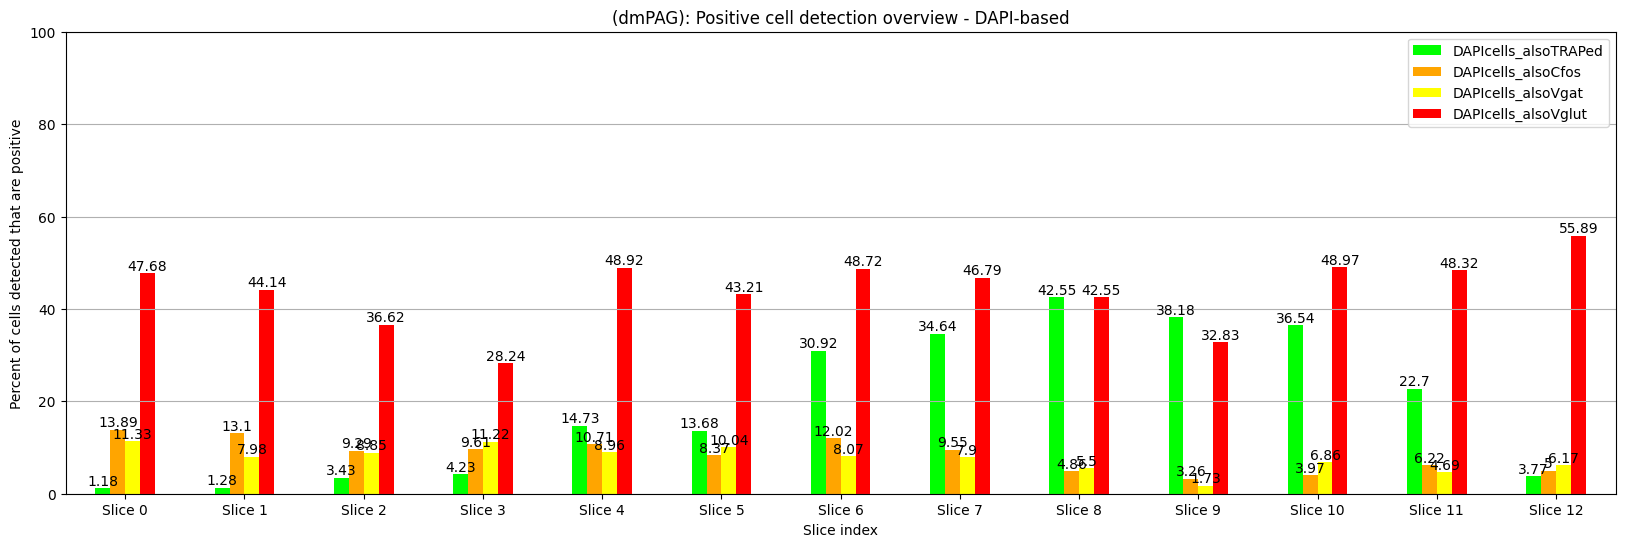

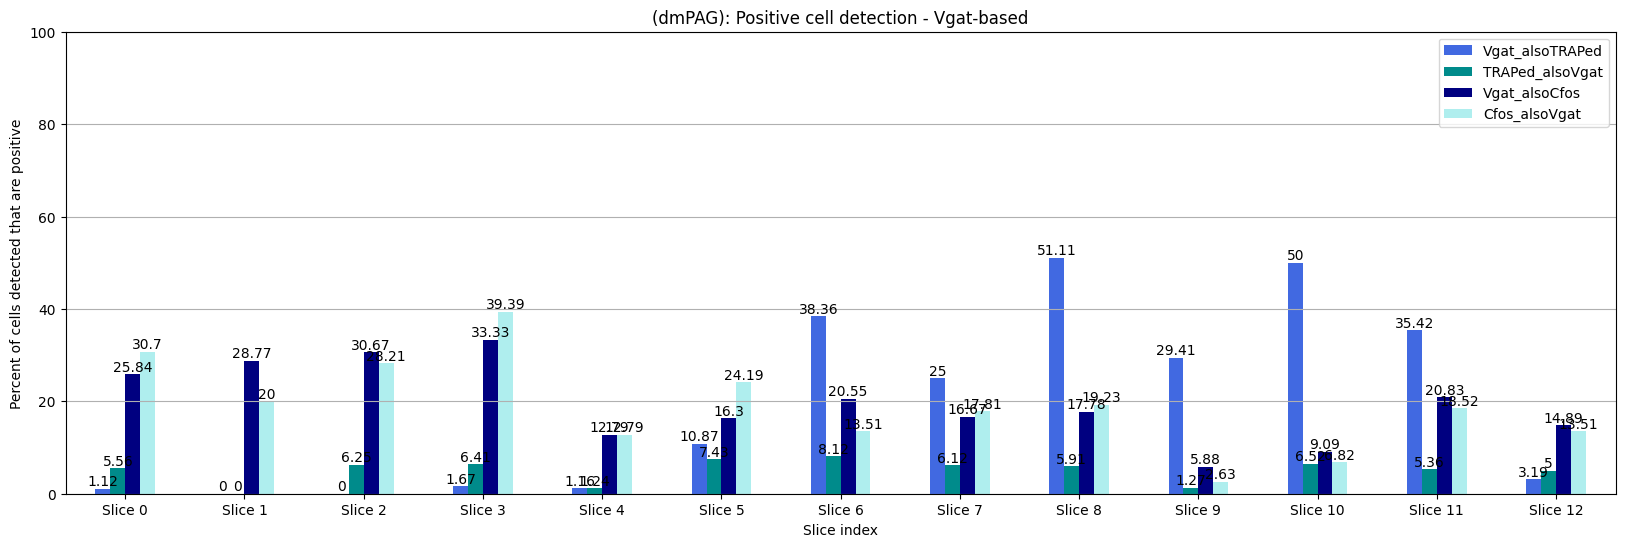

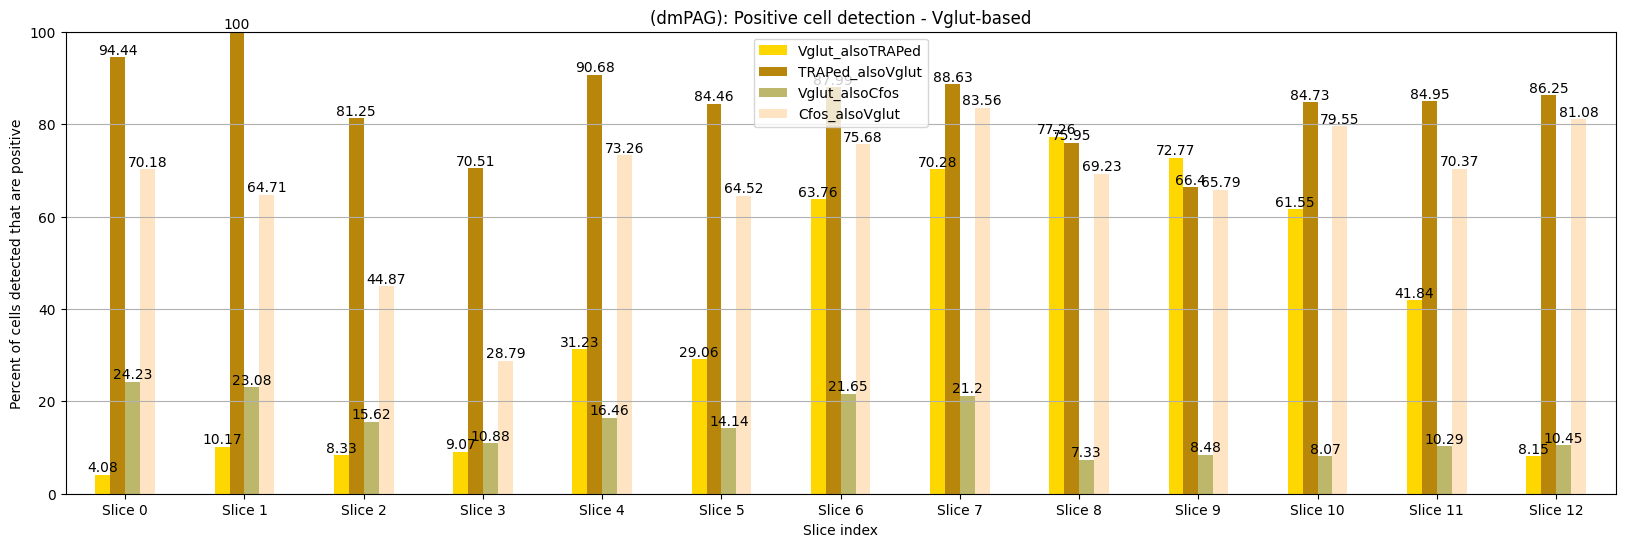

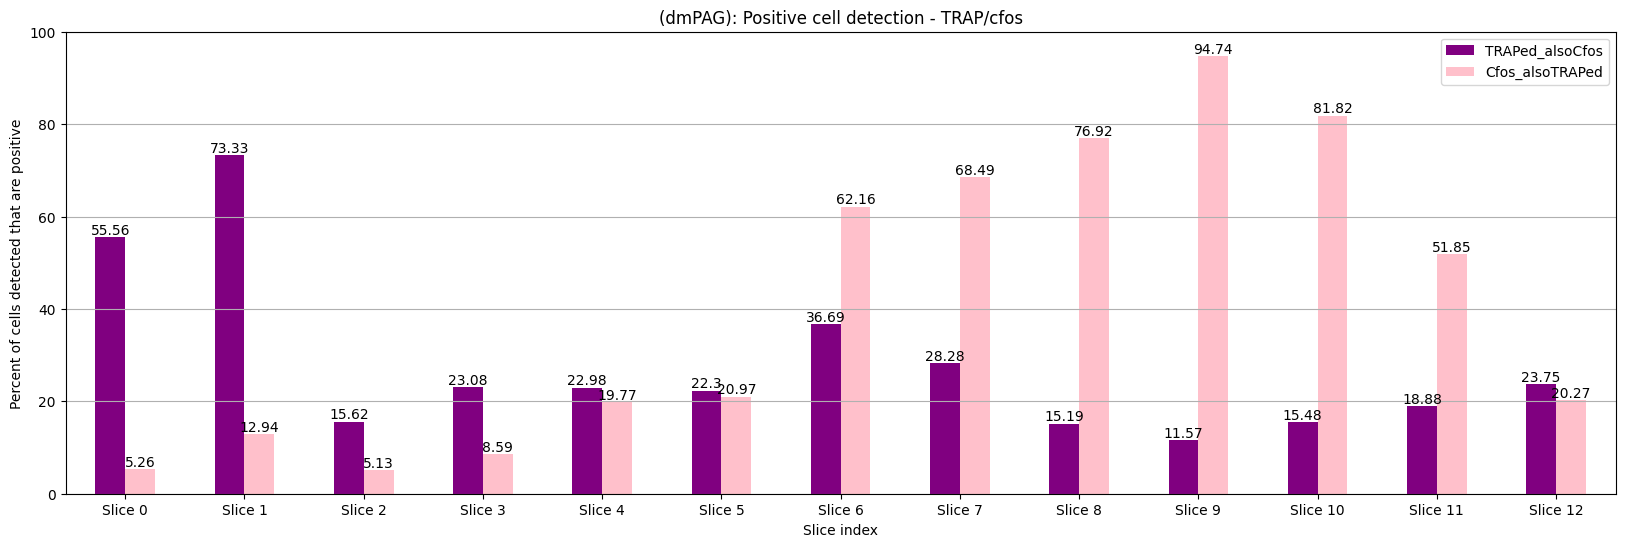

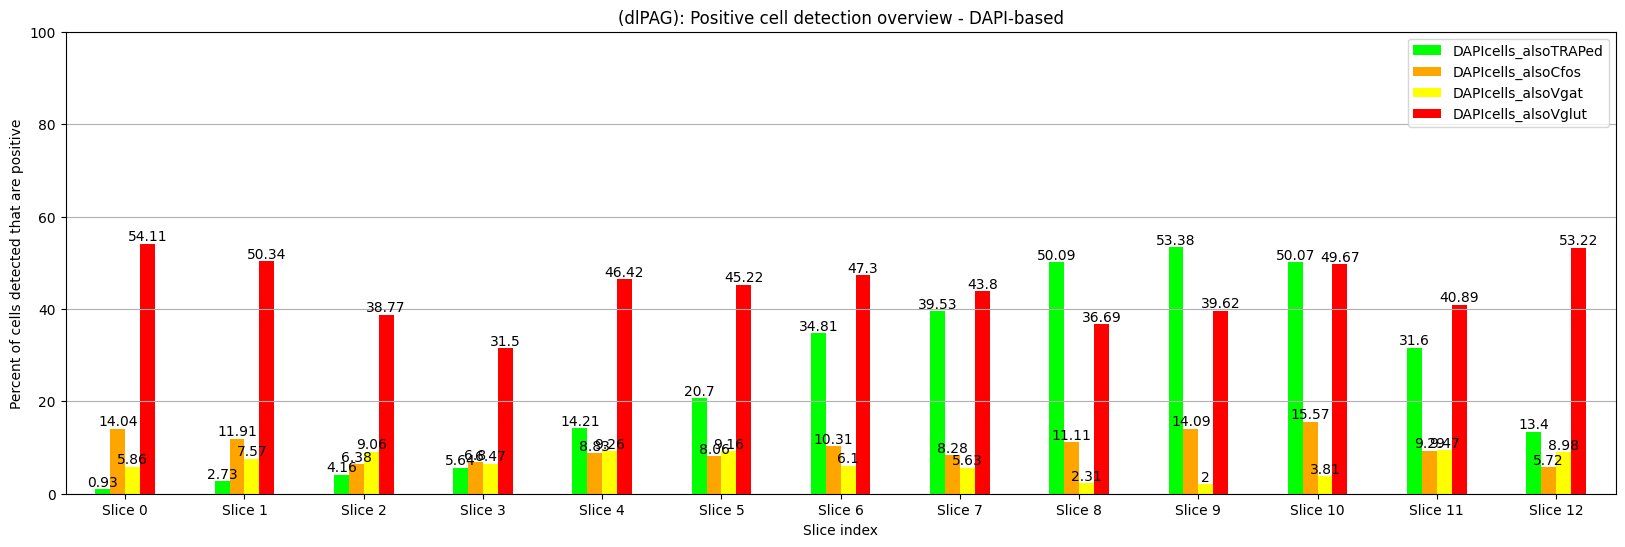

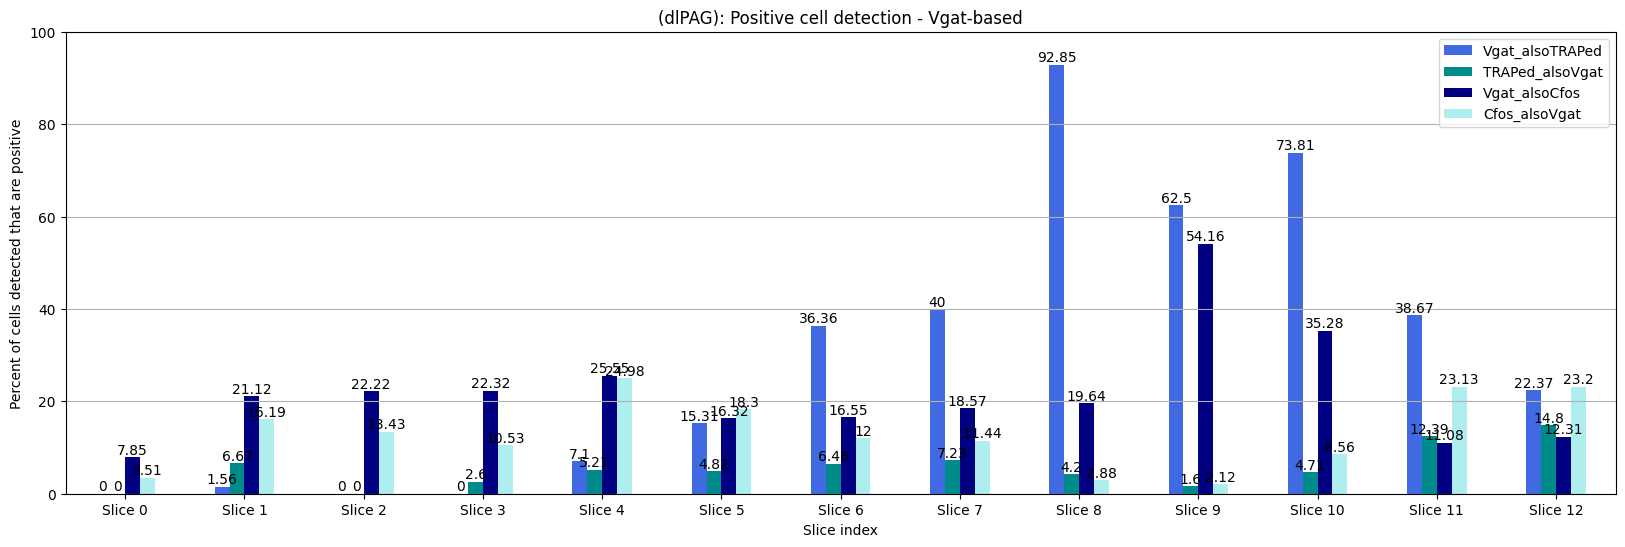

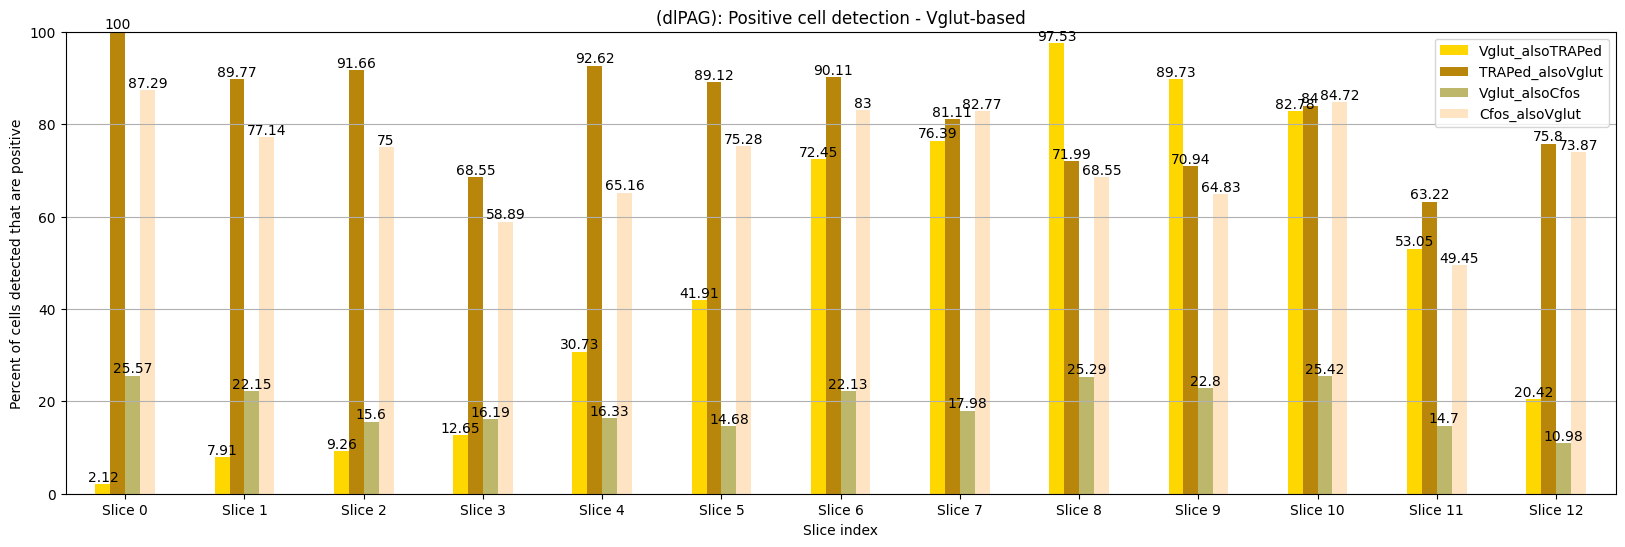

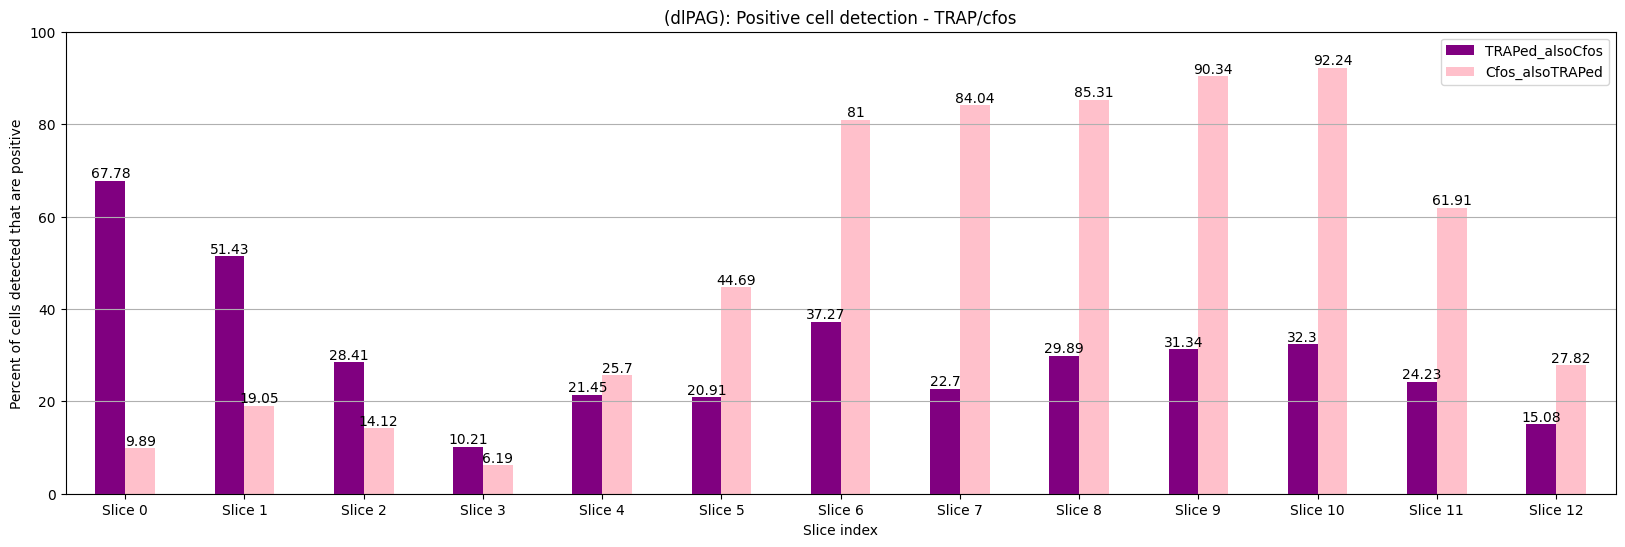

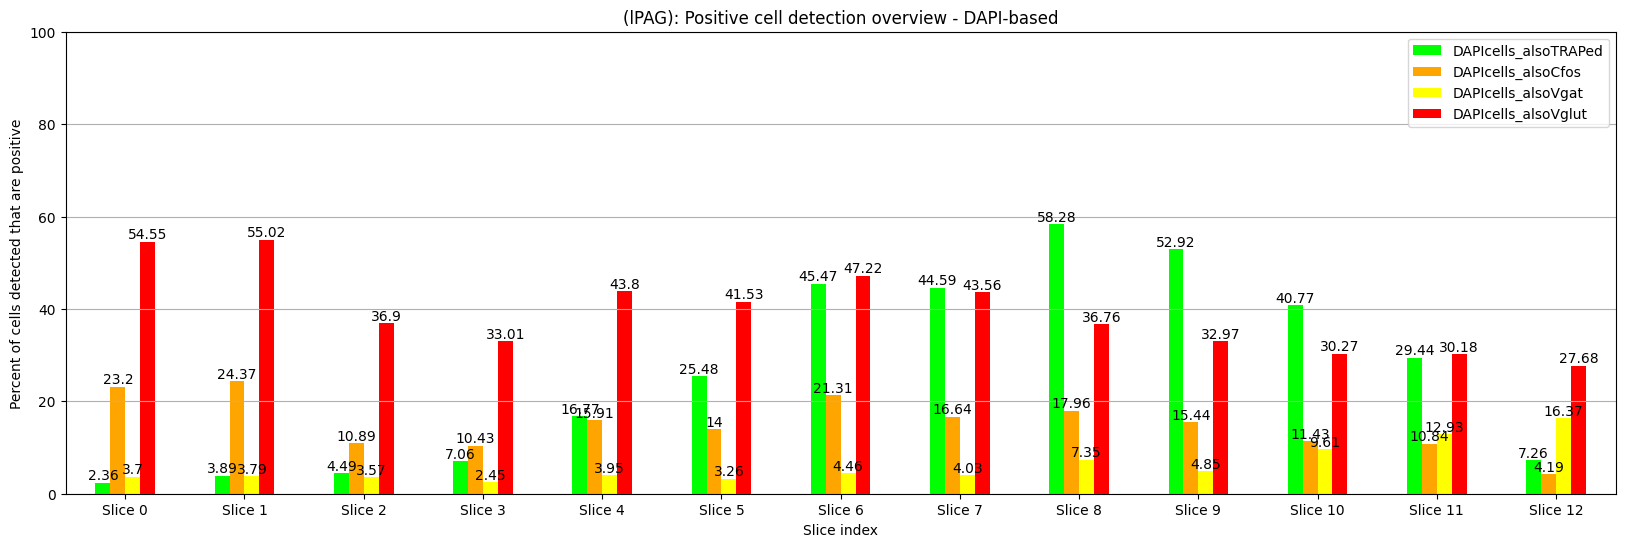

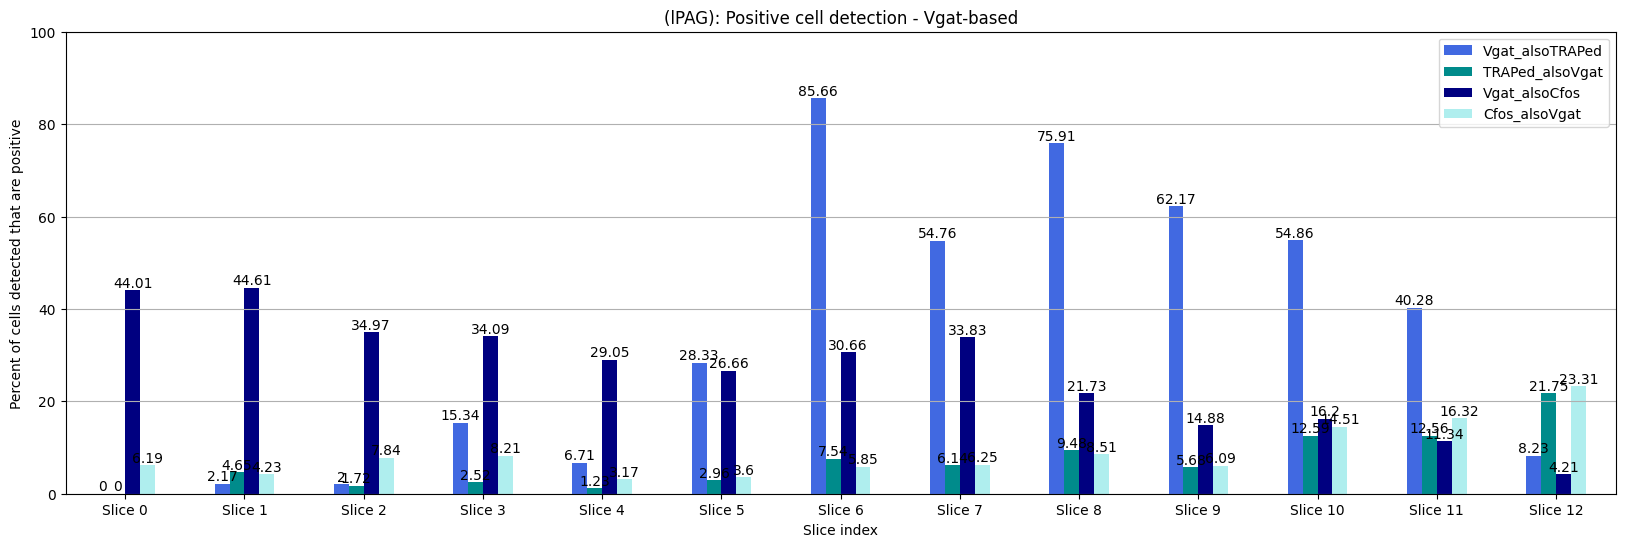

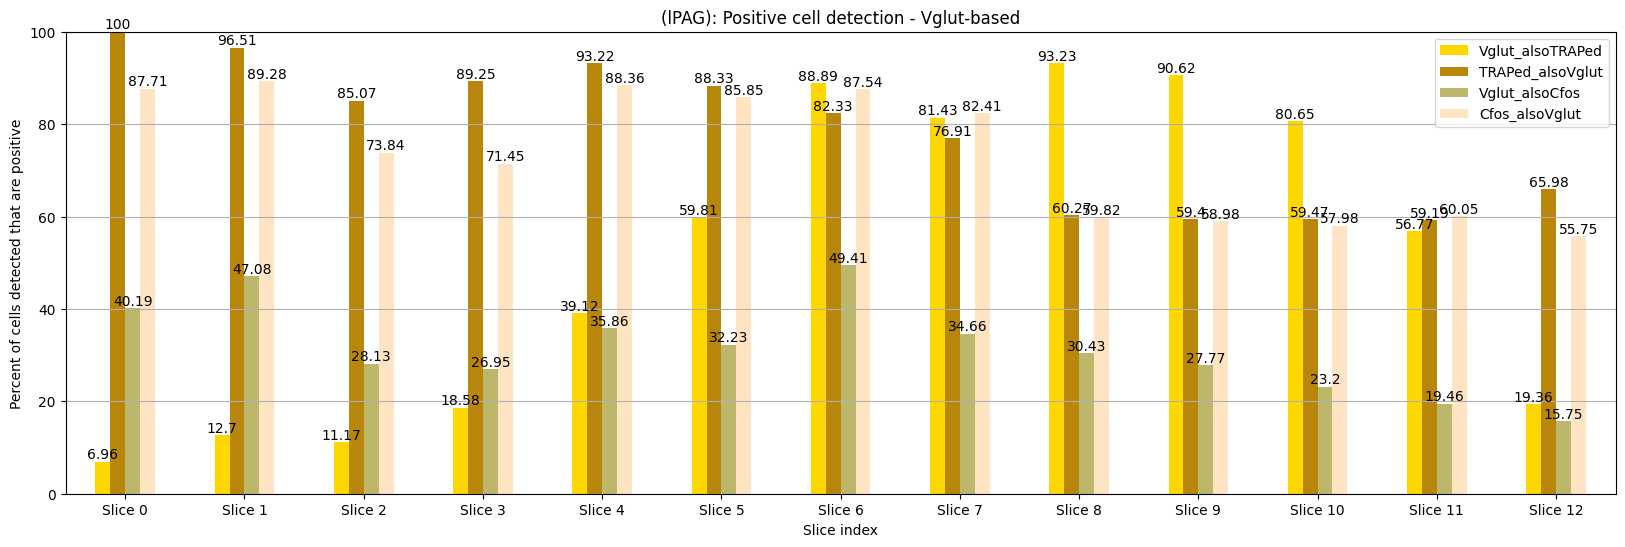

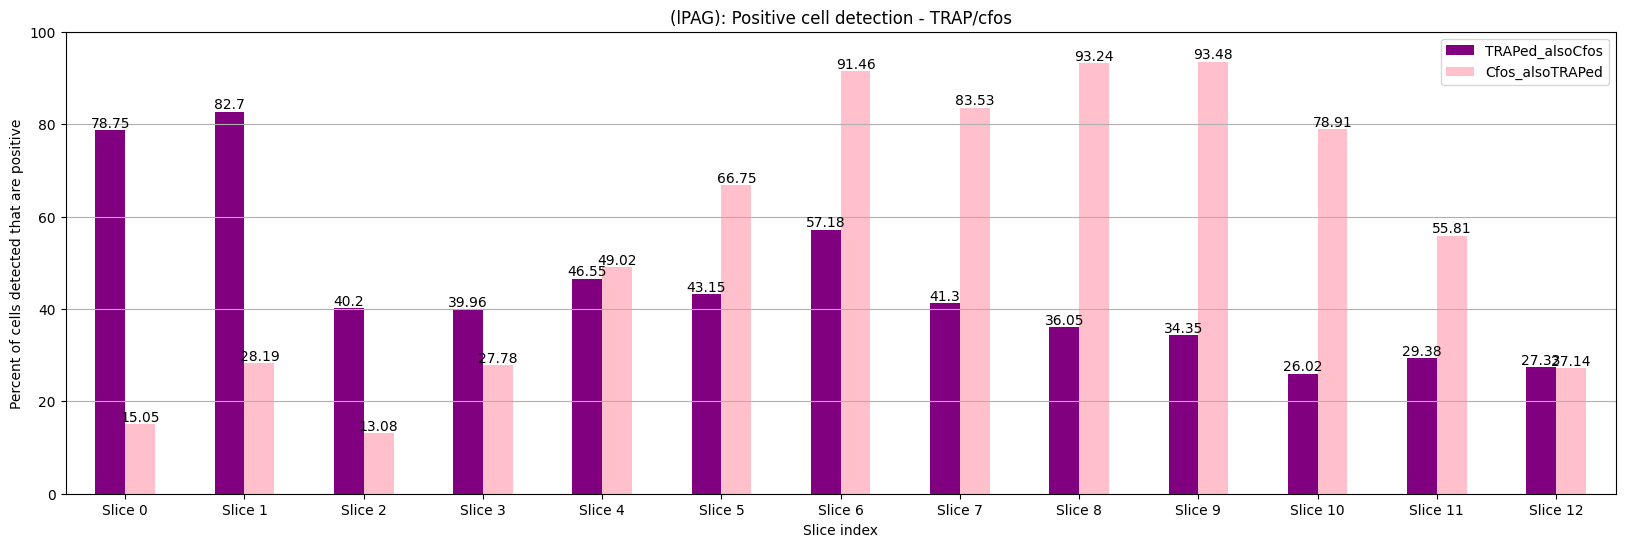

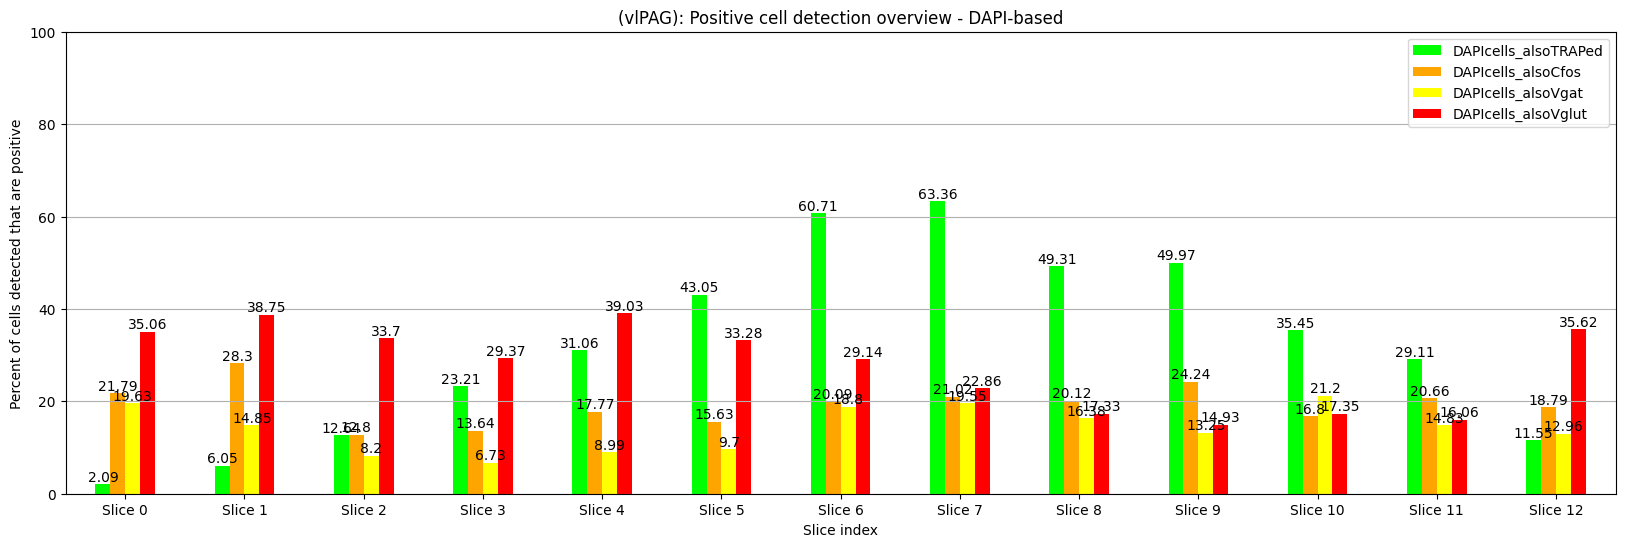

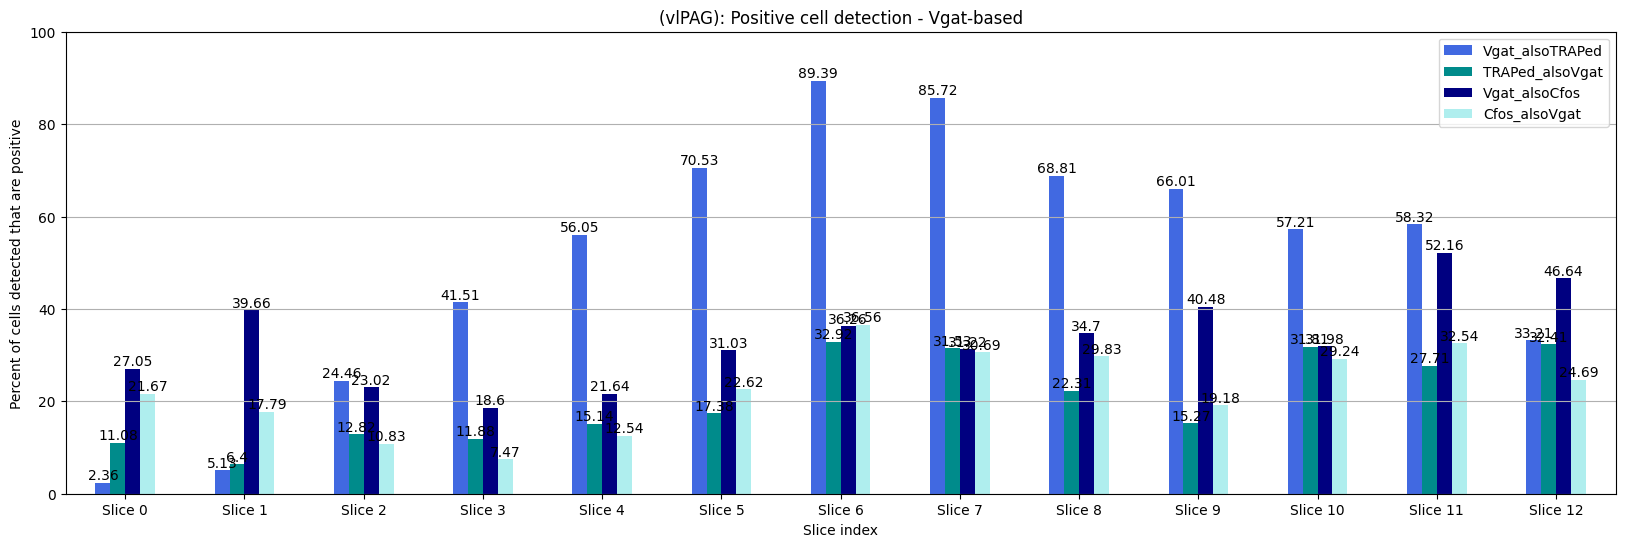

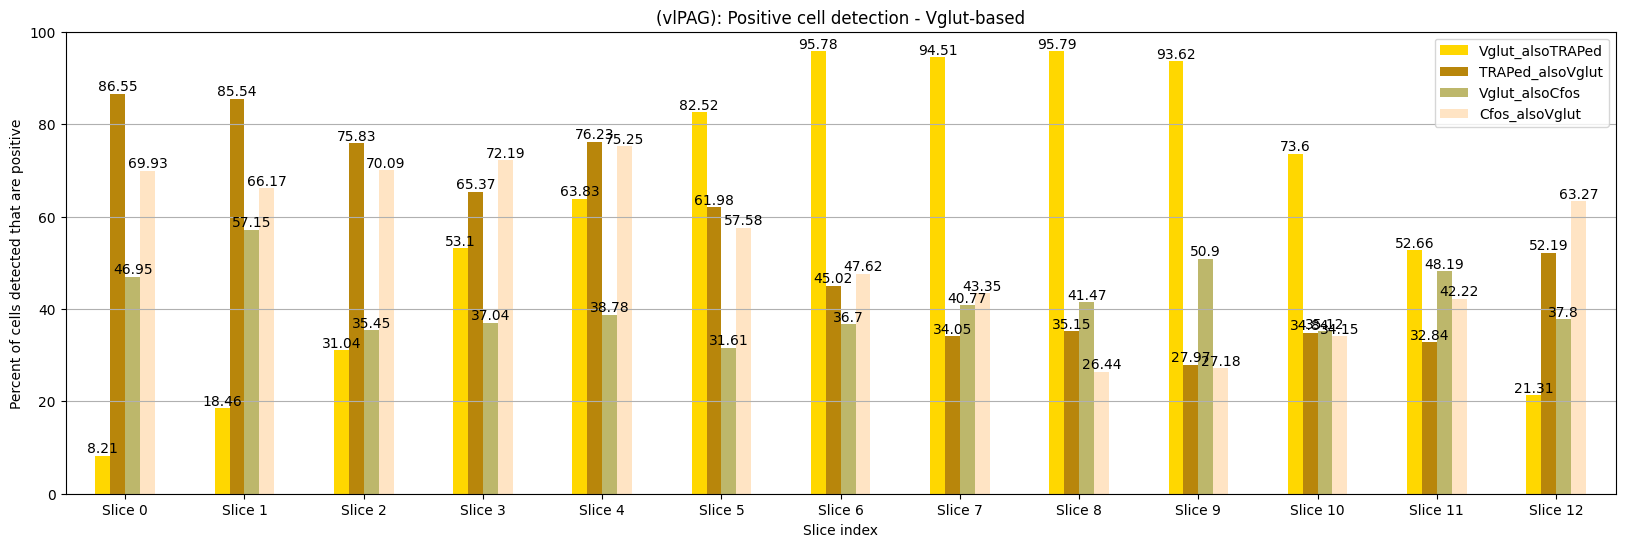

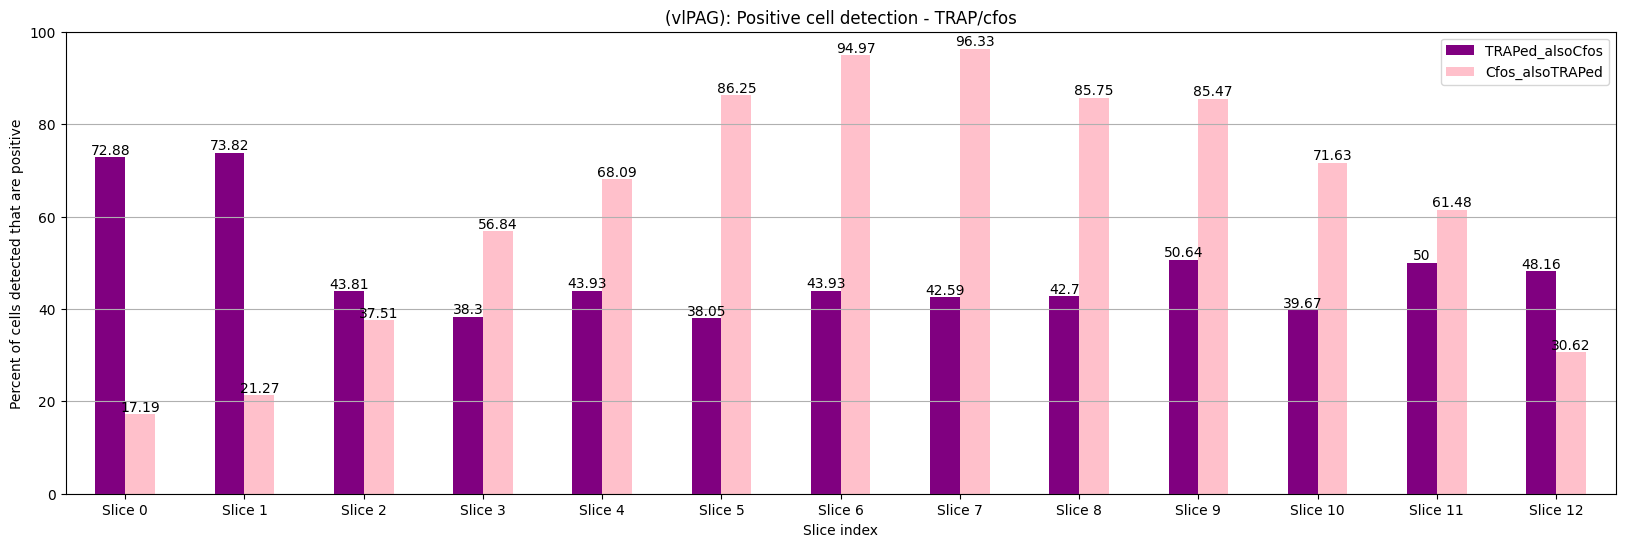

In [8]:
# https://stackoverflow.com/questions/29498652/plot-a-bar-plot-from-a-pandas-dataframe
for region in regions:
    for cell_type_pairing in column_groups: 
        print(cell_type_pairing['columns'], region)
        ax1 = results_per_slice_df_revised[results_per_slice_df_revised['Region'] == region].plot(
            x='Slice index', 
            y=[f'{cell_type_dir}' for cell_type_dir in cell_type_pairing['columns']], # FIX THIS LINE
            color=[column_colors[cell_type_directories.index(val)] for val in cell_type_pairing['columns']],
            kind='bar', 
            title=f"({region}): {cell_type_pairing['title']}", 
            figsize=(20,6), 
            ylabel='Percent of cells detected that are positive', 
            rot=0,
            ylim=[0,100]
        )
        ax1.grid(axis='y')
        for heights in ax1.containers:
            ax1.bar_label(heights)  

### Averaged brain slices

['DAPIcells_alsoTRAPed', 'DAPIcells_alsoCfos', 'DAPIcells_alsoVgat', 'DAPIcells_alsoVglut']
['Vgat_alsoTRAPed', 'TRAPed_alsoVgat', 'Vgat_alsoCfos', 'Cfos_alsoVgat']
['Vglut_alsoTRAPed', 'TRAPed_alsoVglut', 'Vglut_alsoCfos', 'Cfos_alsoVglut']
['TRAPed_alsoCfos', 'Cfos_alsoTRAPed']


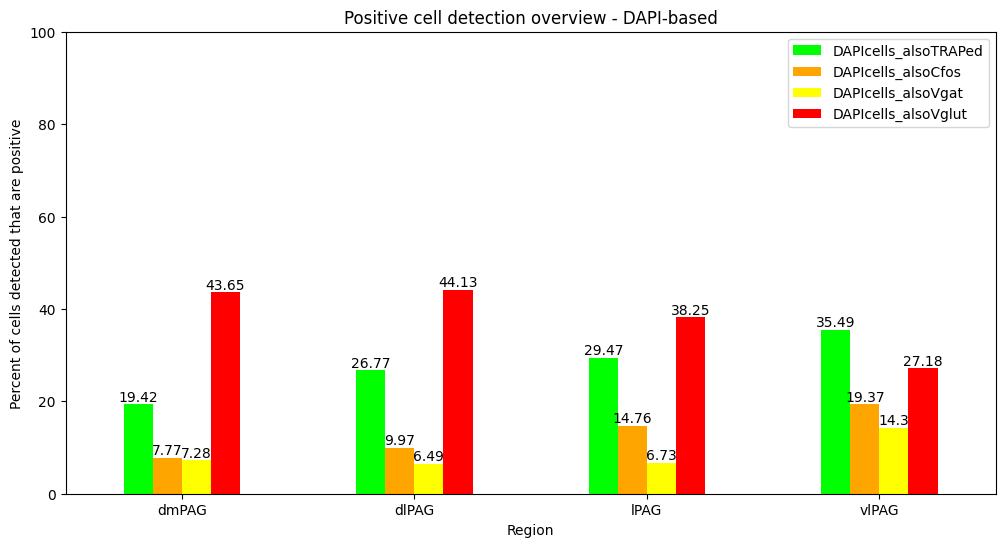

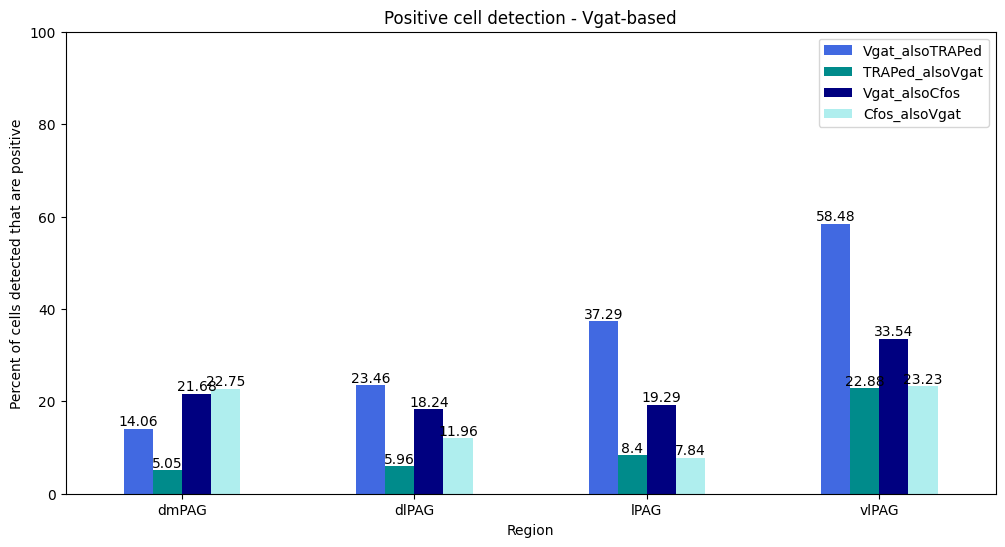

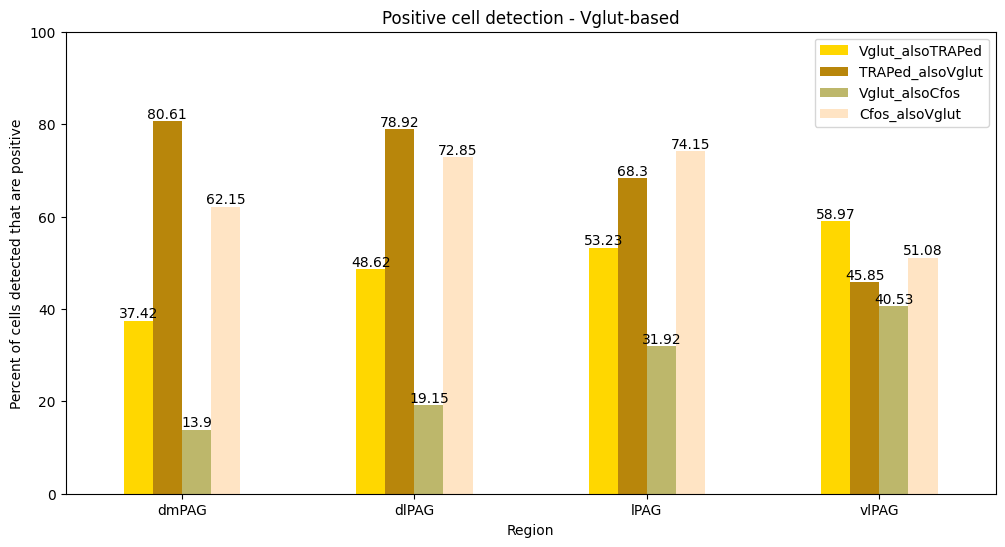

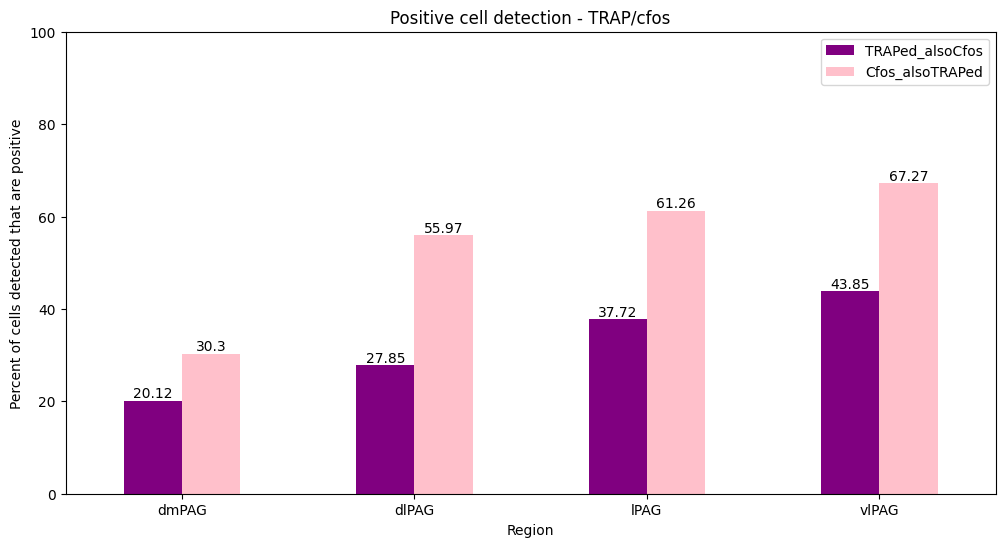

In [9]:
# https://stackoverflow.com/questions/29498652/plot-a-bar-plot-from-a-pandas-dataframe

for cell_type_pairing in column_groups: 
    print(cell_type_pairing['columns'])
    ax1 = results_per_slice_df_avg.plot(
        x='Region', 
        y=[f'{cell_type_dir}' for cell_type_dir in cell_type_pairing['columns']], 
#         yerr=errors,
#         capsize=3,
        color=[column_colors[cell_type_directories.index(val)] for val in cell_type_pairing['columns']],
        kind='bar', 
        title=cell_type_pairing['title'], 
        figsize=(12,6), 
        ylabel='Percent of cells detected that are positive', 
        rot=0,
        ylim=[0,100]
    )
    for heights in ax1.containers:
        ax1.bar_label(heights)  

In [10]:
#################################################
# save data 
#################################################

display(results_per_slice_df_avg)
vgat_vglut_alsoTRAP = {
    'Region': ['dmPAG', 'dlPAG', 'lPAG', 'vlPAG']
}
desired_cell_type = ['Vgat_alsoTRAPed', 'Vglut_alsoTRAPed'] 

for cell_type_dir in desired_cell_type:
    dmPAG = results_per_slice_df_avg[results_per_slice_df_avg['Region'] == 'dmPAG'][cell_type_dir].item()
    dlPAG = results_per_slice_df_avg[results_per_slice_df_avg['Region'] == 'dlPAG'][cell_type_dir].item()
    lPAG = results_per_slice_df_avg[results_per_slice_df_avg['Region'] == 'lPAG'][cell_type_dir].item()
    vlPAG = results_per_slice_df_avg[results_per_slice_df_avg['Region'] == 'vlPAG'][cell_type_dir].item()
    vgat_vglut_alsoTRAP[f'{cell_type_dir}_percent'] = [dmPAG, dlPAG, lPAG, vlPAG]
vgat_vglut_alsoTRAP = pd.DataFrame.from_dict(vgat_vglut_alsoTRAP)
display(vgat_vglut_alsoTRAP)

filepath = Path(f'{output_dir}/vgat_vglut_alsoTRAP.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
vgat_vglut_alsoTRAP.to_csv(filepath, index=False) 

,Region,DAPIcells_alsoTRAPed,DAPIcells_alsoCfos,DAPIcells_alsoVgat,DAPIcells_alsoVglut,Vgat_alsoTRAPed,Vgat_alsoCfos,Vglut_alsoTRAPed,Vglut_alsoCfos,TRAPed_alsoVgat,TRAPed_alsoVglut,Cfos_alsoVgat,Cfos_alsoVglut,TRAPed_alsoCfos,Cfos_alsoTRAPed
0,dmPAG,19.42,7.77,7.28,43.65,14.06,21.68,37.42,13.90,5.05,80.61,22.75,62.15,20.12,30.30
1,dlPAG,26.77,9.97,6.49,44.13,23.46,18.24,48.62,19.15,5.96,78.92,11.96,72.85,27.85,55.97
2,lPAG,29.47,14.76,6.73,38.25,37.29,19.29,53.23,31.92,8.40,68.30,7.84,74.15,37.72,61.26
3,vlPAG,35.49,19.37,14.30,27.18,58.48,33.54,58.97,40.53,22.88,45.85,23.23,51.08,43.85,67.27


,Region,Vgat_alsoTRAPed_percent,Vglut_alsoTRAPed_percent
0,dmPAG,14.06,37.42
1,dlPAG,23.46,48.62
2,lPAG,37.29,53.23
3,vlPAG,58.48,58.97


## Enrichment ratios

### Individual brain slices (anterior to posterior)

In [11]:
enrichment_ratio_pairs = ['TRAPed_alsoVgat', 'TRAPed_alsoVglut', 'Cfos_alsoVgat', 'Cfos_alsoVglut']
Vgat_pairs = ['TRAPed_alsoVgat', 'Cfos_alsoVgat']
Vglut_pairs = ['TRAPed_alsoVglut', 'Cfos_alsoVglut']

enrichment_ratios = vgat_vglut_per_slice_revised.copy()
print(enrichment_ratios.shape, vgat_vglut_per_slice_revised.shape, results_per_slice_df_revised.shape)
for cell_type_pairing in Vgat_pairs:
#     display(results_per_slice_df_revised[results_per_slice_df_revised['Slice index'].isin(['Slice 16', 'Slice 17'])])
    enrichment_ratios[f'Positive % for {cell_type_pairing}'] = results_per_slice_df_revised[cell_type_pairing]
#     display(enrichment_ratios[enrichment_ratios['Slice index'].isin(['Slice 16', 'Slice 17'])])
    enrichment_ratios[f'{cell_type_pairing}'] = results_per_slice_df_revised[cell_type_pairing].div(vgat_vglut_per_slice_revised['Vgat/(Vgat+Vglut)'], axis=0)

for cell_type_pairing in Vglut_pairs:
    enrichment_ratios[f'Positive % for {cell_type_pairing}'] = results_per_slice_df_revised[cell_type_pairing]
    enrichment_ratios[f'{cell_type_pairing}'] = results_per_slice_df_revised[cell_type_pairing].div(vgat_vglut_per_slice_revised['Vglut/(Vgat+Vglut)'], axis=0)

enrichment_ratios = pd.DataFrame.from_dict(enrichment_ratios)
enrichment_ratios = enrichment_ratios.round(2)
display(enrichment_ratios)

(52, 4) (52, 4) (52, 16)


,Slice index,Region,Vgat/(Vgat+Vglut),Vglut/(Vgat+Vglut),Positive % for TRAPed_alsoVgat,TRAPed_alsoVgat,Positive % for Cfos_alsoVgat,Cfos_alsoVgat,Positive % for TRAPed_alsoVglut,TRAPed_alsoVglut,Positive % for Cfos_alsoVglut,Cfos_alsoVglut
0,Slice 0,dmPAG,18.50,81.50,5.56,0.30,30.70,1.66,94.44,1.16,70.18,0.86
1,Slice 0,dlPAG,10.57,89.43,0.00,0.00,3.51,0.33,100.00,1.12,87.29,0.98
2,Slice 0,lPAG,6.60,93.40,0.00,0.00,6.19,0.94,100.00,1.07,87.71,0.94
3,Slice 0,vlPAG,35.98,64.02,11.08,0.31,21.67,0.60,86.55,1.35,69.93,1.09
4,Slice 1,dmPAG,15.34,84.66,0.00,0.00,20.00,1.30,100.00,1.18,64.71,0.76
5,Slice 1,dlPAG,13.51,86.49,6.67,0.49,16.19,1.20,89.77,1.04,77.14,0.89
6,Slice 1,lPAG,6.46,93.54,4.65,0.72,4.23,0.65,96.51,1.03,89.28,0.95
7,Slice 1,vlPAG,28.07,71.93,6.40,0.23,17.79,0.63,85.54,1.19,66.17,0.92
8,Slice 2,dmPAG,20.66,79.34,6.25,0.30,28.21,1.37,81.25,1.02,44.87,0.57
9,Slice 2,dlPAG,16.66,83.34,0.00,0.00,13.43,0.81,91.66,1.10,75.00,0.90


In [12]:
# storing the dataset as data frame
# dataframe = pd.DataFrame(data.data, columns=data.feature_names)

# The scope of these changes
# are local with systems to with statement.
with pd.option_context('display.max_rows', None,):
    print(enrichment_ratios[enrichment_ratios['Slice index'] == 'Slice 6'])

   Slice index Region  Vgat/(Vgat+Vglut)  Vglut/(Vgat+Vglut)  \
24     Slice 6  dmPAG              14.66               85.34   
25     Slice 6  dlPAG              11.54               88.46   
26     Slice 6   lPAG               9.35               90.65   
27     Slice 6  vlPAG              44.66               55.34   

    Positive % for TRAPed_alsoVgat  TRAPed_alsoVgat  \
24                            8.12             0.55   
25                            6.46             0.56   
26                            7.54             0.81   
27                           32.92             0.74   

    Positive % for Cfos_alsoVgat  Cfos_alsoVgat  \
24                         13.51           0.92   
25                         12.00           1.04   
26                          5.85           0.63   
27                         36.56           0.82   

    Positive % for TRAPed_alsoVglut  TRAPed_alsoVglut  \
24                            87.99              1.03   
25                            90.

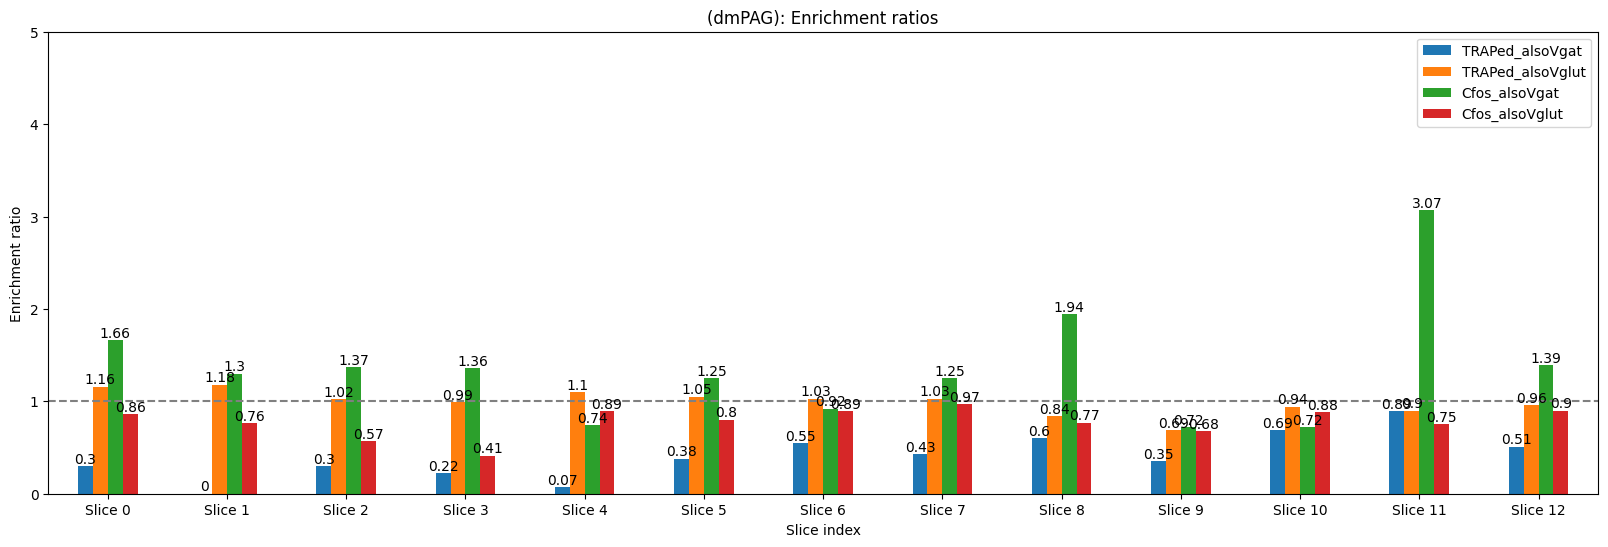

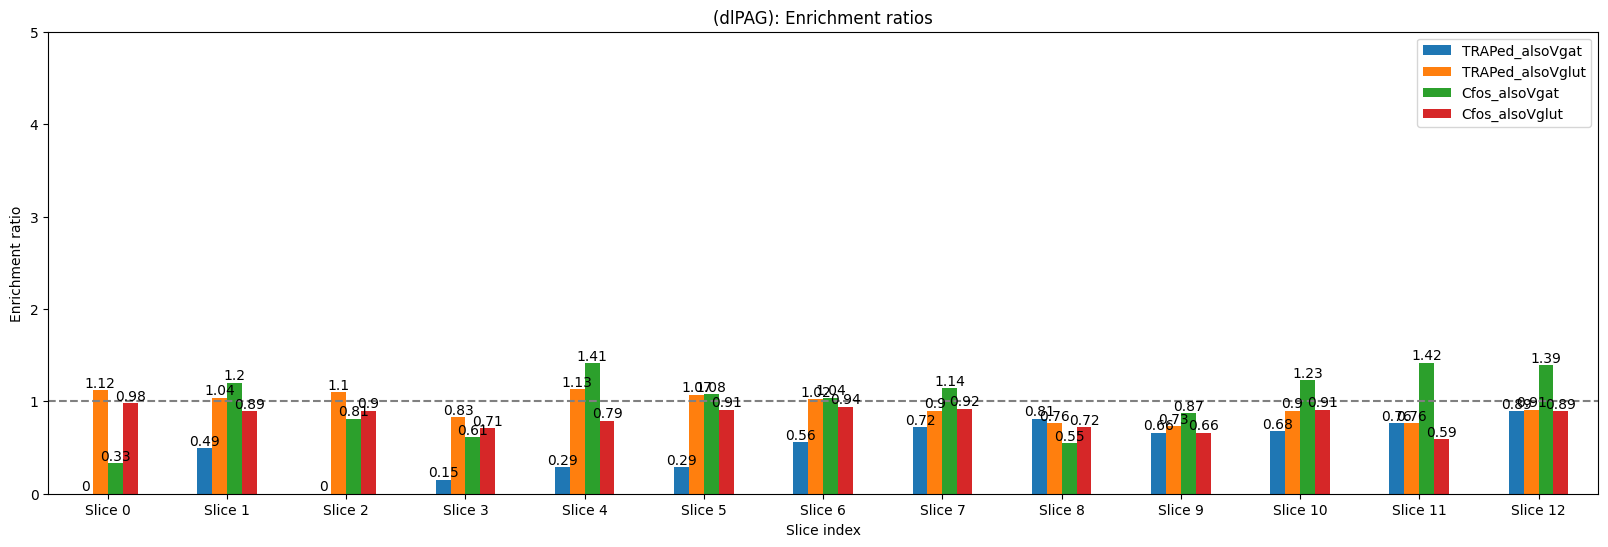

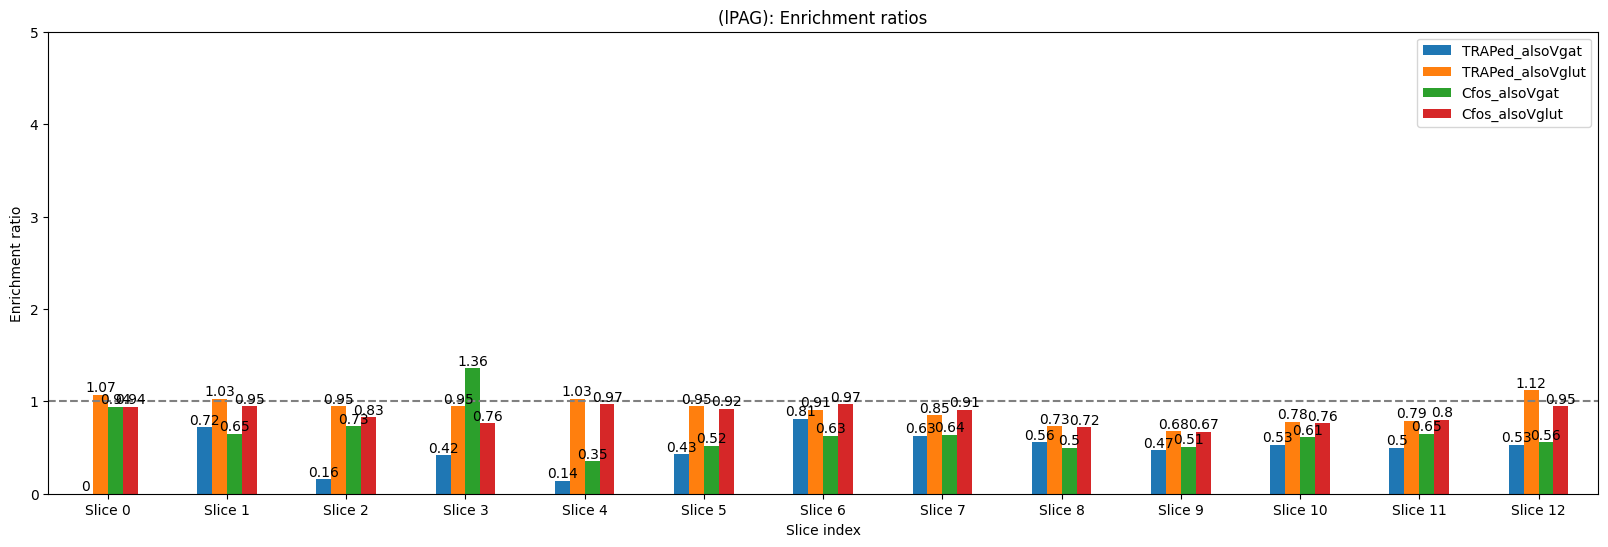

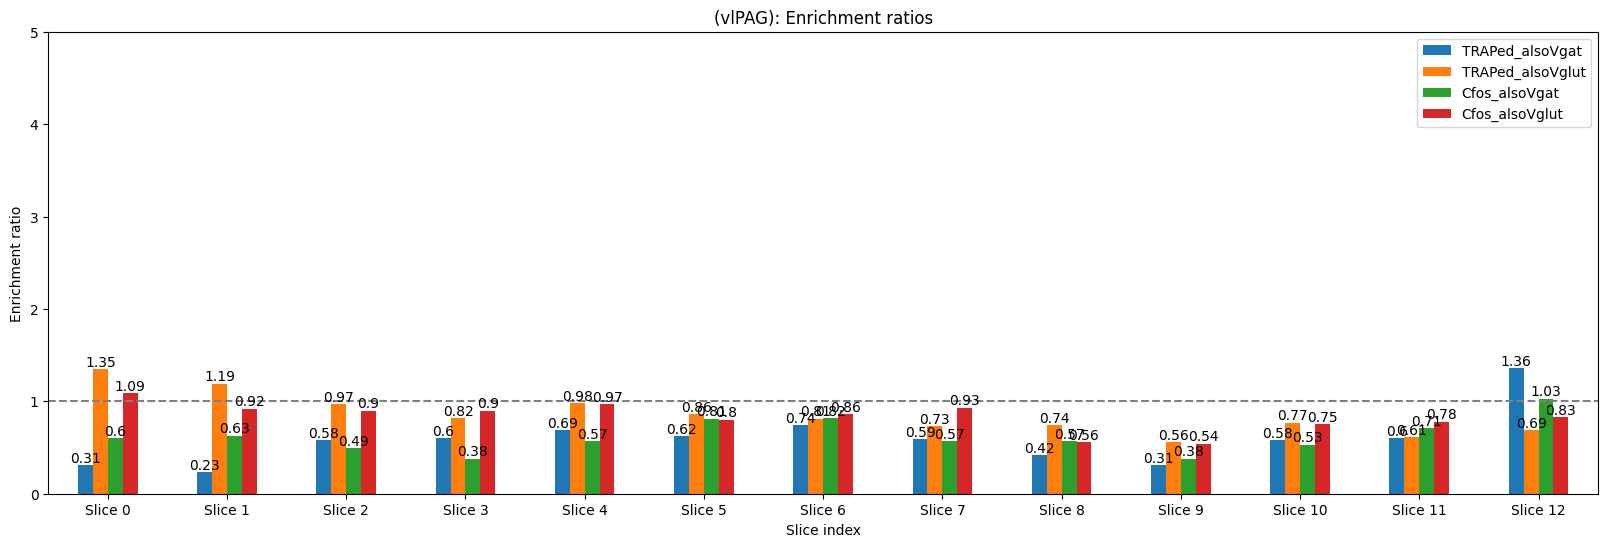

In [13]:
for region in regions:
    ax1 = enrichment_ratios[enrichment_ratios['Region'] == region].plot(
        x='Slice index', 
        y=[f'{cell_type_dir}' for cell_type_dir in enrichment_ratio_pairs],
#             color=[column_colors[cell_type_directories.index(val)] for val in cell_type_pairing['columns']],
        kind='bar', 
        title=f"({region}): Enrichment ratios", 
        figsize=(20,6), 
        ylabel='Enrichment ratio', 
        rot=0,
        ylim=[0,5]
    )
    ax1.axhline(1, ls="--", color="gray")
    for heights in ax1.containers:
        ax1.bar_label(heights)  

In [14]:
#################################################
# save slice-by-slice enrichment ratios using GLOBAL slice indices (to combine with other brains using aligned slice indices)
#################################################

global_slices = []
for slice_string in enrichment_ratios['Slice index']:
    int_idx = int(slice_string.split(" ")[-1])
#     print(int_idx)
    global_slices.append(f'Slice {global_indices[int_idx]}')
print(global_slices)
    
display(enrichment_ratios)
global_slices_enrichment_ratios = {
    'Region': enrichment_ratios['Region'],
#     'Slice index': enrichment_ratios['Slice index'],
    'Global slice index': global_slices,
    'TRAPed_alsoVgat': enrichment_ratios['TRAPed_alsoVgat'],
    'TRAPed_alsoVglut': enrichment_ratios['TRAPed_alsoVglut'],
}
global_slices_enrichment_ratios = pd.DataFrame.from_dict(global_slices_enrichment_ratios)
display(global_slices_enrichment_ratios)

# in case of multiple slices per global slice --> average the values
pooled_global_slices_enrichment_ratio = global_slices_enrichment_ratios.groupby(['Region', 'Global slice index'])[['TRAPed_alsoVgat', 'TRAPed_alsoVglut']].mean()
pooled_global_slices_enrichment_ratio = pooled_global_slices_enrichment_ratio.reset_index()
display(pooled_global_slices_enrichment_ratio)

filepath = Path(f'{output_dir}/global_slices_enrichment_ratios.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
global_slices_enrichment_ratios.to_csv(filepath, index=False) 




['Slice 2', 'Slice 2', 'Slice 2', 'Slice 2', 'Slice 3', 'Slice 3', 'Slice 3', 'Slice 3', 'Slice 4', 'Slice 4', 'Slice 4', 'Slice 4', 'Slice 4', 'Slice 4', 'Slice 4', 'Slice 4', 'Slice 5', 'Slice 5', 'Slice 5', 'Slice 5', 'Slice 6', 'Slice 6', 'Slice 6', 'Slice 6', 'Slice 7', 'Slice 7', 'Slice 7', 'Slice 7', 'Slice 8', 'Slice 8', 'Slice 8', 'Slice 8', 'Slice 9', 'Slice 9', 'Slice 9', 'Slice 9', 'Slice 9', 'Slice 9', 'Slice 9', 'Slice 9', 'Slice 10', 'Slice 10', 'Slice 10', 'Slice 10', 'Slice 11', 'Slice 11', 'Slice 11', 'Slice 11', 'Slice 12', 'Slice 12', 'Slice 12', 'Slice 12']


,Slice index,Region,Vgat/(Vgat+Vglut),Vglut/(Vgat+Vglut),Positive % for TRAPed_alsoVgat,TRAPed_alsoVgat,Positive % for Cfos_alsoVgat,Cfos_alsoVgat,Positive % for TRAPed_alsoVglut,TRAPed_alsoVglut,Positive % for Cfos_alsoVglut,Cfos_alsoVglut
0,Slice 0,dmPAG,18.50,81.50,5.56,0.30,30.70,1.66,94.44,1.16,70.18,0.86
1,Slice 0,dlPAG,10.57,89.43,0.00,0.00,3.51,0.33,100.00,1.12,87.29,0.98
2,Slice 0,lPAG,6.60,93.40,0.00,0.00,6.19,0.94,100.00,1.07,87.71,0.94
3,Slice 0,vlPAG,35.98,64.02,11.08,0.31,21.67,0.60,86.55,1.35,69.93,1.09
4,Slice 1,dmPAG,15.34,84.66,0.00,0.00,20.00,1.30,100.00,1.18,64.71,0.76
5,Slice 1,dlPAG,13.51,86.49,6.67,0.49,16.19,1.20,89.77,1.04,77.14,0.89
6,Slice 1,lPAG,6.46,93.54,4.65,0.72,4.23,0.65,96.51,1.03,89.28,0.95
7,Slice 1,vlPAG,28.07,71.93,6.40,0.23,17.79,0.63,85.54,1.19,66.17,0.92
8,Slice 2,dmPAG,20.66,79.34,6.25,0.30,28.21,1.37,81.25,1.02,44.87,0.57
9,Slice 2,dlPAG,16.66,83.34,0.00,0.00,13.43,0.81,91.66,1.10,75.00,0.90


,Region,Global slice index,TRAPed_alsoVgat,TRAPed_alsoVglut
0,dmPAG,Slice 2,0.30,1.16
1,dlPAG,Slice 2,0.00,1.12
2,lPAG,Slice 2,0.00,1.07
3,vlPAG,Slice 2,0.31,1.35
4,dmPAG,Slice 3,0.00,1.18
5,dlPAG,Slice 3,0.49,1.04
6,lPAG,Slice 3,0.72,1.03
7,vlPAG,Slice 3,0.23,1.19
8,dmPAG,Slice 4,0.30,1.02
9,dlPAG,Slice 4,0.00,1.10


,Region,Global slice index,TRAPed_alsoVgat,TRAPed_alsoVglut
0,dlPAG,Slice 10,0.680,0.900
1,dlPAG,Slice 11,0.760,0.760
2,dlPAG,Slice 12,0.890,0.910
3,dlPAG,Slice 2,0.000,1.120
4,dlPAG,Slice 3,0.490,1.040
5,dlPAG,Slice 4,0.075,0.965
6,dlPAG,Slice 5,0.290,1.130
7,dlPAG,Slice 6,0.290,1.070
8,dlPAG,Slice 7,0.560,1.020
9,dlPAG,Slice 8,0.720,0.900


### Averaged brain slices

In [15]:
# find pooled average for enrichment ratios
display(vgat_vglut_per_slice)
pooled_vgat_vglut = vgat_vglut_per_slice.groupby('Region')[['# Vgat', '# Vglut', '# Vgat+Vglut']].sum()
enrichment_ratios_avg = pooled_vgat_vglut.copy()

for cell_type_pairing in Vgat_pairs:
    pooled = results_per_slice_df.groupby('Region')[[f'{cell_type_pairing}_numerator', f'{cell_type_pairing}_denominator']].sum()
    pooled[f'{cell_type_pairing}_percent'] = pooled[f'{cell_type_pairing}_numerator'] / pooled[f'{cell_type_pairing}_denominator'] * 100
#     display(pooled)
    pooled_vgat_vglut['Vgat/(Vgat+Vglut)'] = pooled_vgat_vglut['# Vgat'] / pooled_vgat_vglut['# Vgat+Vglut'] * 100 
#     display(pooled_vgat_vglut)
    enrichment_ratios_avg['Vgat/(Vgat+Vglut)'] = pooled_vgat_vglut['Vgat/(Vgat+Vglut)']
    enrichment_ratios_avg[f'Pooled Positive % for {cell_type_pairing}'] = pooled[f'{cell_type_pairing}_percent']
    enrichment_ratios_avg[f'{cell_type_pairing}'] = pooled[f'{cell_type_pairing}_percent'].div(pooled_vgat_vglut['Vgat/(Vgat+Vglut)'], axis=0)

for cell_type_pairing in Vglut_pairs:
    pooled = results_per_slice_df.groupby('Region')[[f'{cell_type_pairing}_numerator', f'{cell_type_pairing}_denominator']].sum()
    pooled[f'{cell_type_pairing}_percent'] = pooled[f'{cell_type_pairing}_numerator'] / pooled[f'{cell_type_pairing}_denominator'] * 100
#     display(pooled)
    pooled_vgat_vglut['Vglut/(Vgat+Vglut)'] = pooled_vgat_vglut['# Vglut'] / pooled_vgat_vglut['# Vgat+Vglut'] * 100 
#     display(pooled_vgat_vglut)
    enrichment_ratios_avg['Vglut/(Vgat+Vglut)'] = pooled_vgat_vglut['Vglut/(Vgat+Vglut)']
    enrichment_ratios_avg[f'Pooled Positive % for {cell_type_pairing}'] = pooled[f'{cell_type_pairing}_percent']
    enrichment_ratios_avg[f'{cell_type_pairing}'] = pooled[f'{cell_type_pairing}_percent'].div(pooled_vgat_vglut['Vglut/(Vgat+Vglut)'], axis=0)

display(pooled_vgat_vglut)
# enrichment_ratios_avg = pd.DataFrame.from_dict(enrichment_ratios_avg)
enrichment_ratios_avg = enrichment_ratios_avg.round(2)
enrichment_ratios_avg = enrichment_ratios_avg.reset_index()
display(enrichment_ratios_avg)

# find left-right average
enrichment_ratios_final = {
    'Region': ['dmPAG', 'dlPAG', 'lPAG', 'vlPAG']
}
for cell_type_pairing in enrichment_ratio_pairs:
    dmPAG = enrichment_ratios_avg[enrichment_ratios_avg['Region'] == 'dmPAG'][cell_type_pairing].item()
    dlPAG = round((enrichment_ratios_avg[enrichment_ratios_avg['Region'] == 'dlPAG_l'][cell_type_pairing].item() + enrichment_ratios_avg[enrichment_ratios_avg['Region'] == 'dlPAG_r'][cell_type_pairing].item())/2, 2)
    lPAG = round((enrichment_ratios_avg[enrichment_ratios_avg['Region'] == 'lPAG_l'][cell_type_pairing].item() + enrichment_ratios_avg[enrichment_ratios_avg['Region'] == 'lPAG_r'][cell_type_pairing].item())/2, 2)
    vlPAG = round((enrichment_ratios_avg[enrichment_ratios_avg['Region'] == 'vlPAG_l'][cell_type_pairing].item() + enrichment_ratios_avg[enrichment_ratios_avg['Region'] == 'vlPAG_r'][cell_type_pairing].item())/2, 2)
    enrichment_ratios_final[cell_type_pairing] = [dmPAG, dlPAG, lPAG, vlPAG]
enrichment_ratios_final = pd.DataFrame.from_dict(enrichment_ratios_final)
display(enrichment_ratios_final)

,Slice index,Region,# Vgat,# Vglut,# Vgat+Vglut,Vgat/(Vgat+Vglut),Vglut/(Vgat+Vglut)
0,Slice 0,dmPAG,89,392,481,18.503119,81.496881
1,Slice 0,dlPAG_l,24,213,237,10.126582,89.873418
2,Slice 0,dlPAG_r,26,210,236,11.016949,88.983051
3,Slice 0,lPAG_l,14,282,296,4.729730,95.270270
4,Slice 0,lPAG_r,31,335,366,8.469945,91.530055
...,...,...,...,...,...,...,...
86,Slice 12,dlPAG_r,54,337,391,13.810742,86.189258
87,Slice 12,lPAG_l,171,378,549,31.147541,68.852459
88,Slice 12,lPAG_r,109,103,212,51.415094,48.584906
89,Slice 12,vlPAG_l,83,243,326,25.460123,74.539877


,# Vgat,# Vglut,# Vgat+Vglut,Vgat/(Vgat+Vglut),Vglut/(Vgat+Vglut)
Region,,,,,
dlPAG_l,425,2856,3281,12.953368,87.046632
dlPAG_r,447,3138,3585,12.468619,87.531381
dmPAG,1010,6286,7296,13.843202,86.156798
lPAG_l,684,3960,4644,14.728682,85.271318
lPAG_r,680,3877,4557,14.922098,85.077902
vlPAG_l,1828,3055,4883,37.436002,62.563998
vlPAG_r,1597,2837,4434,36.017140,63.982860


,Region,# Vgat,# Vglut,# Vgat+Vglut,Vgat/(Vgat+Vglut),Pooled Positive % for TRAPed_alsoVgat,TRAPed_alsoVgat,Pooled Positive % for Cfos_alsoVgat,Cfos_alsoVgat,Vglut/(Vgat+Vglut),Pooled Positive % for TRAPed_alsoVglut,TRAPed_alsoVglut,Pooled Positive % for Cfos_alsoVglut,Cfos_alsoVglut
0,dlPAG_l,425,2856,3281,12.95,6.85,0.53,11.09,0.86,87.05,73.91,0.85,67.33,0.77
1,dlPAG_r,447,3138,3585,12.47,5.06,0.41,12.82,1.03,87.53,83.93,0.96,78.37,0.90
2,dmPAG,1010,6286,7296,13.84,5.05,0.36,22.75,1.64,86.16,80.61,0.94,62.15,0.72
3,lPAG_l,684,3960,4644,14.73,9.09,0.62,6.28,0.43,85.27,65.42,0.77,73.94,0.87
4,lPAG_r,680,3877,4557,14.92,7.71,0.52,9.40,0.63,85.08,71.17,0.84,74.36,0.87
5,vlPAG_l,1828,3055,4883,37.44,23.76,0.63,24.79,0.66,62.56,45.15,0.72,49.57,0.79
6,vlPAG_r,1597,2837,4434,36.02,21.99,0.61,21.67,0.60,63.98,46.56,0.73,52.58,0.82


,Region,TRAPed_alsoVgat,TRAPed_alsoVglut,Cfos_alsoVgat,Cfos_alsoVglut
0,dmPAG,0.36,0.94,1.64,0.72
1,dlPAG,0.47,0.91,0.95,0.83
2,lPAG,0.57,0.80,0.53,0.87
3,vlPAG,0.62,0.72,0.63,0.80


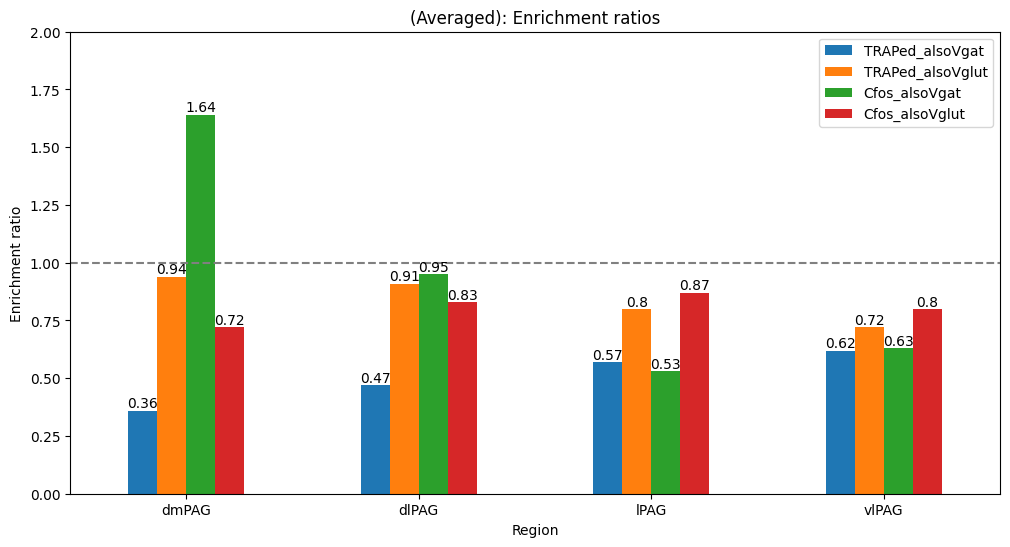

In [16]:
ax1 = enrichment_ratios_final.plot(
    x='Region', 
    y=[f'{cell_type_dir}' for cell_type_dir in enrichment_ratio_pairs], 
    kind='bar', 
    title="(Averaged): Enrichment ratios", 
    figsize=(12,6), 
    ylabel='Enrichment ratio', 
    rot=0,
    ylim=[0,2]
)
ax1.axhline(1, ls="--", color="gray")
for heights in ax1.containers:
    ax1.bar_label(heights) 

## TRAP vs cfos comparison

,Region,DAPIcells_alsoTRAPed_numerator,DAPIcells_alsoCfos_numerator,TRAPed_alsoCfos_numerator,TRAPed_alsoCfos_denominator,Cfos_alsoTRAPed_numerator,Cfos_alsoTRAPed_denominator
Region,,,,,,,
dlPAG_l,dlPAG_l,2676,899,667,2292,417,658
dlPAG_r,dlPAG_r,1910,816,457,1718,303,624
dmPAG,dmPAG,3522,1410,638,3171,313,1033
lPAG_l,lPAG_l,4178,1882,1392,3829,1006,1577
lPAG_r,lPAG_r,3075,1739,1136,2907,868,1478
vlPAG_l,vlPAG_l,4259,2527,1763,4053,1334,2106
vlPAG_r,vlPAG_r,4796,2421,2010,4547,1449,2035


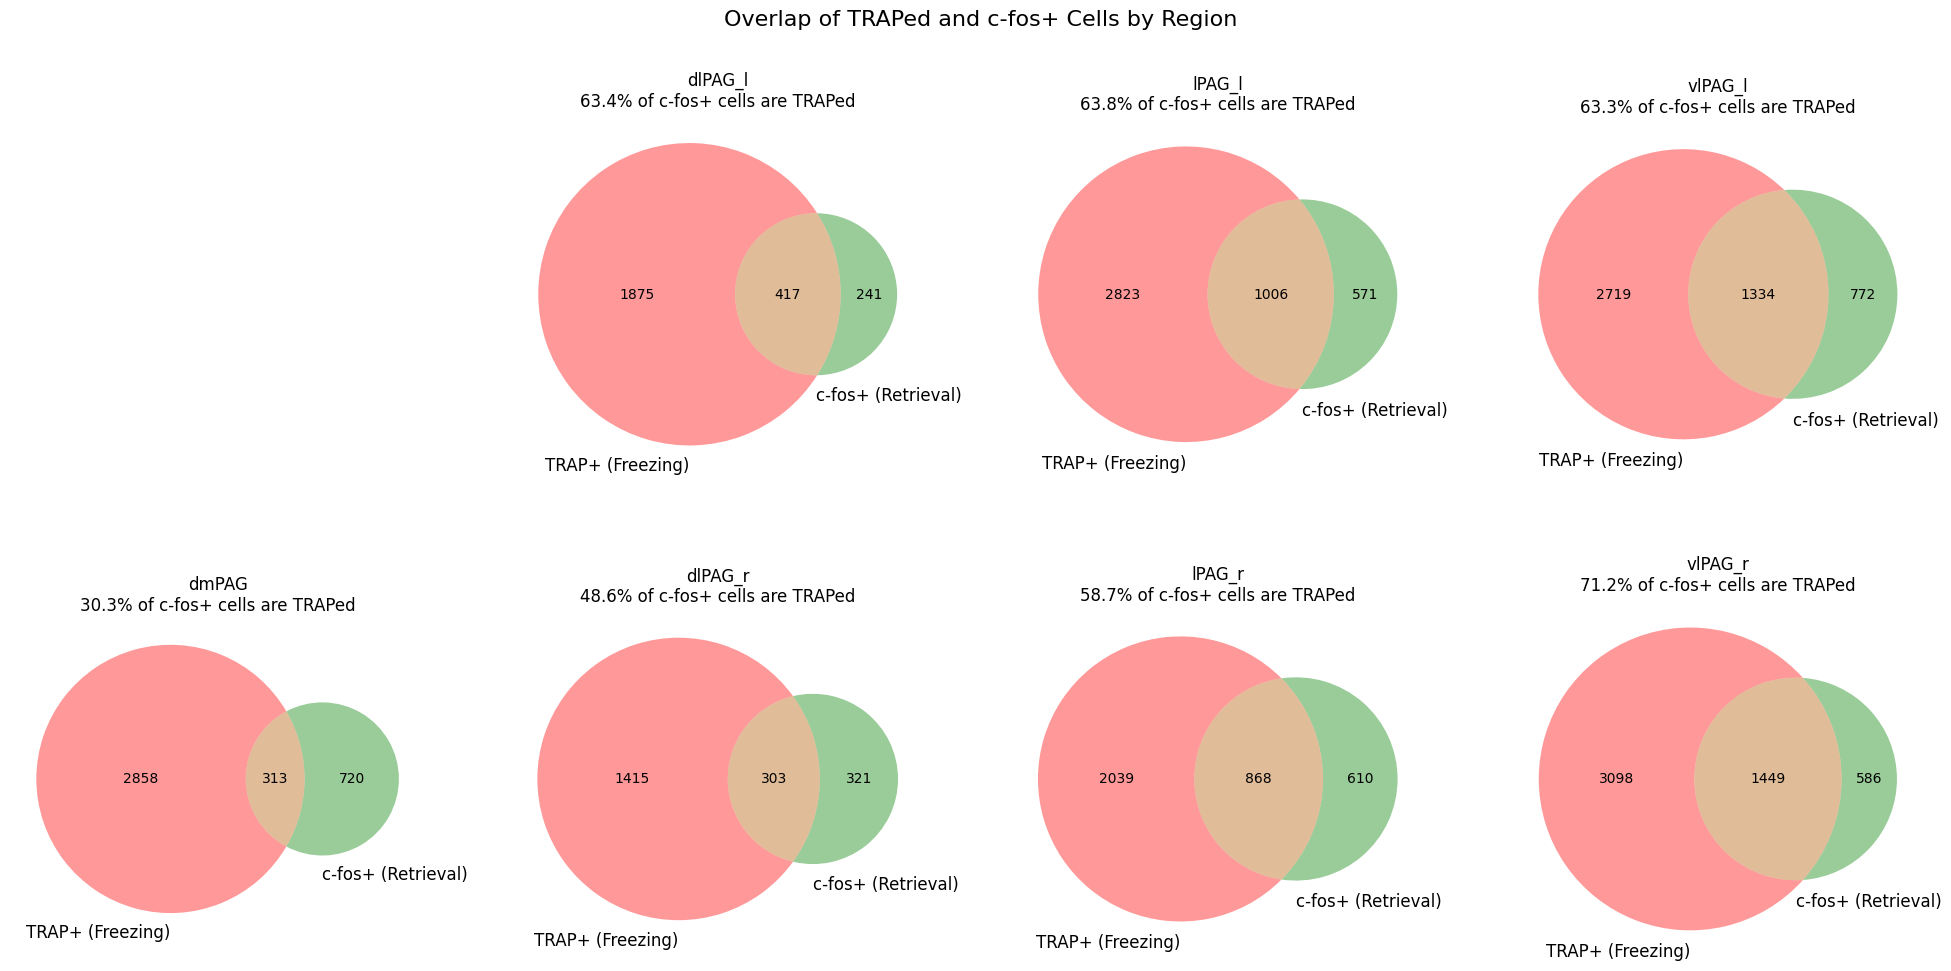

In [17]:
TRAP_cfos_pairs = ['DAPIcells_alsoTRAPed', 'DAPIcells_alsoCfos', 'TRAPed_alsoCfos', 'Cfos_alsoTRAPed']
overlap = {
    'Region': [],
}
for cell_type_dir in TRAP_cfos_pairs:
    if cell_type_dir in ['DAPIcells_alsoTRAPed', 'DAPIcells_alsoCfos']:
        pooled = results_per_slice_df.groupby('Region')[[f'{cell_type_dir}_numerator']].sum()
        overlap[f'{cell_type_dir}_numerator'] = pooled[f'{cell_type_dir}_numerator']
    else:
        pooled = results_per_slice_df.groupby('Region')[[f'{cell_type_dir}_numerator', f'{cell_type_dir}_denominator']].sum()
        overlap[f'{cell_type_dir}_numerator'] = pooled[f'{cell_type_dir}_numerator']
        overlap[f'{cell_type_dir}_denominator'] = pooled[f'{cell_type_dir}_denominator'] 
    if len(overlap['Region']) == 0:
        overlap['Region'] = pooled.index.to_list()  


overlap = pd.DataFrame.from_dict(overlap)
display(overlap)
    
# Create 7 subplots
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns (1 extra blank)
axs = axs.T.flatten()
regions = ['dmPAG', 'dlPAG_l', 'dlPAG_r', 'lPAG_l', 'lPAG_r', 'vlPAG_l', 'vlPAG_r']
for i, region in enumerate(regions):
    ax = axs[i+1]
    A = overlap.loc[region, 'TRAPed_alsoCfos_denominator']
    B = overlap.loc[region, 'Cfos_alsoTRAPed_denominator']
    overlap_amount = min(overlap.loc[region, 'TRAPed_alsoCfos_numerator'], overlap.loc[region, 'Cfos_alsoTRAPed_numerator'])
    
    venn = venn2(
        subsets=(A - overlap_amount, B - overlap_amount, overlap_amount),
        set_labels=('TRAP+ (Freezing)', 'c-fos+ (Retrieval)'),
        ax=ax
    )
    
    # Calculate % of cFos+ that are TRAPed
    percent = (overlap_amount / B) * 100
    ax.set_title(f"{region}\n{percent:.1f}% of c-fos+ cells are TRAPed", fontsize=12)
    
# Remove unused subplot (8th one)
fig.delaxes(axs[0])

plt.tight_layout()
plt.suptitle("Overlap of TRAPed and c-fos+ Cells by Region", fontsize=16, y=1.02)
plt.show()

,Region,DAPIcells_alsoTRAPed_numerator,DAPIcells_alsoCfos_numerator,TRAPed_alsoCfos_numerator,TRAPed_alsoCfos_denominator,Cfos_alsoTRAPed_numerator,Cfos_alsoTRAPed_denominator
Region,,,,,,,
dlPAG_l,dlPAG_l,2676,899,667,2292,417,658
dlPAG_r,dlPAG_r,1910,816,457,1718,303,624
dmPAG,dmPAG,3522,1410,638,3171,313,1033
lPAG_l,lPAG_l,4178,1882,1392,3829,1006,1577
lPAG_r,lPAG_r,3075,1739,1136,2907,868,1478
vlPAG_l,vlPAG_l,4259,2527,1763,4053,1334,2106
vlPAG_r,vlPAG_r,4796,2421,2010,4547,1449,2035


,Region,DAPIcells_alsoTRAPed_numerator,DAPIcells_alsoCfos_numerator,TRAPed_alsoCfos_numerator,TRAPed_alsoCfos_denominator,Cfos_alsoTRAPed_numerator,Cfos_alsoTRAPed_denominator,min_numerator,TRAPed_alsoCfos_percent,Cfos_alsoTRAPed_percent
0,dmPAG,3522,1410,638,3171,313,1033,313,9.87,30.30
1,dlPAG,4586,1715,1124,4010,720,1282,720,17.96,56.16
2,lPAG,7253,3621,2528,6736,1874,3055,1874,27.82,61.34
3,vlPAG,9055,4948,3773,8600,2783,4141,2783,32.36,67.21


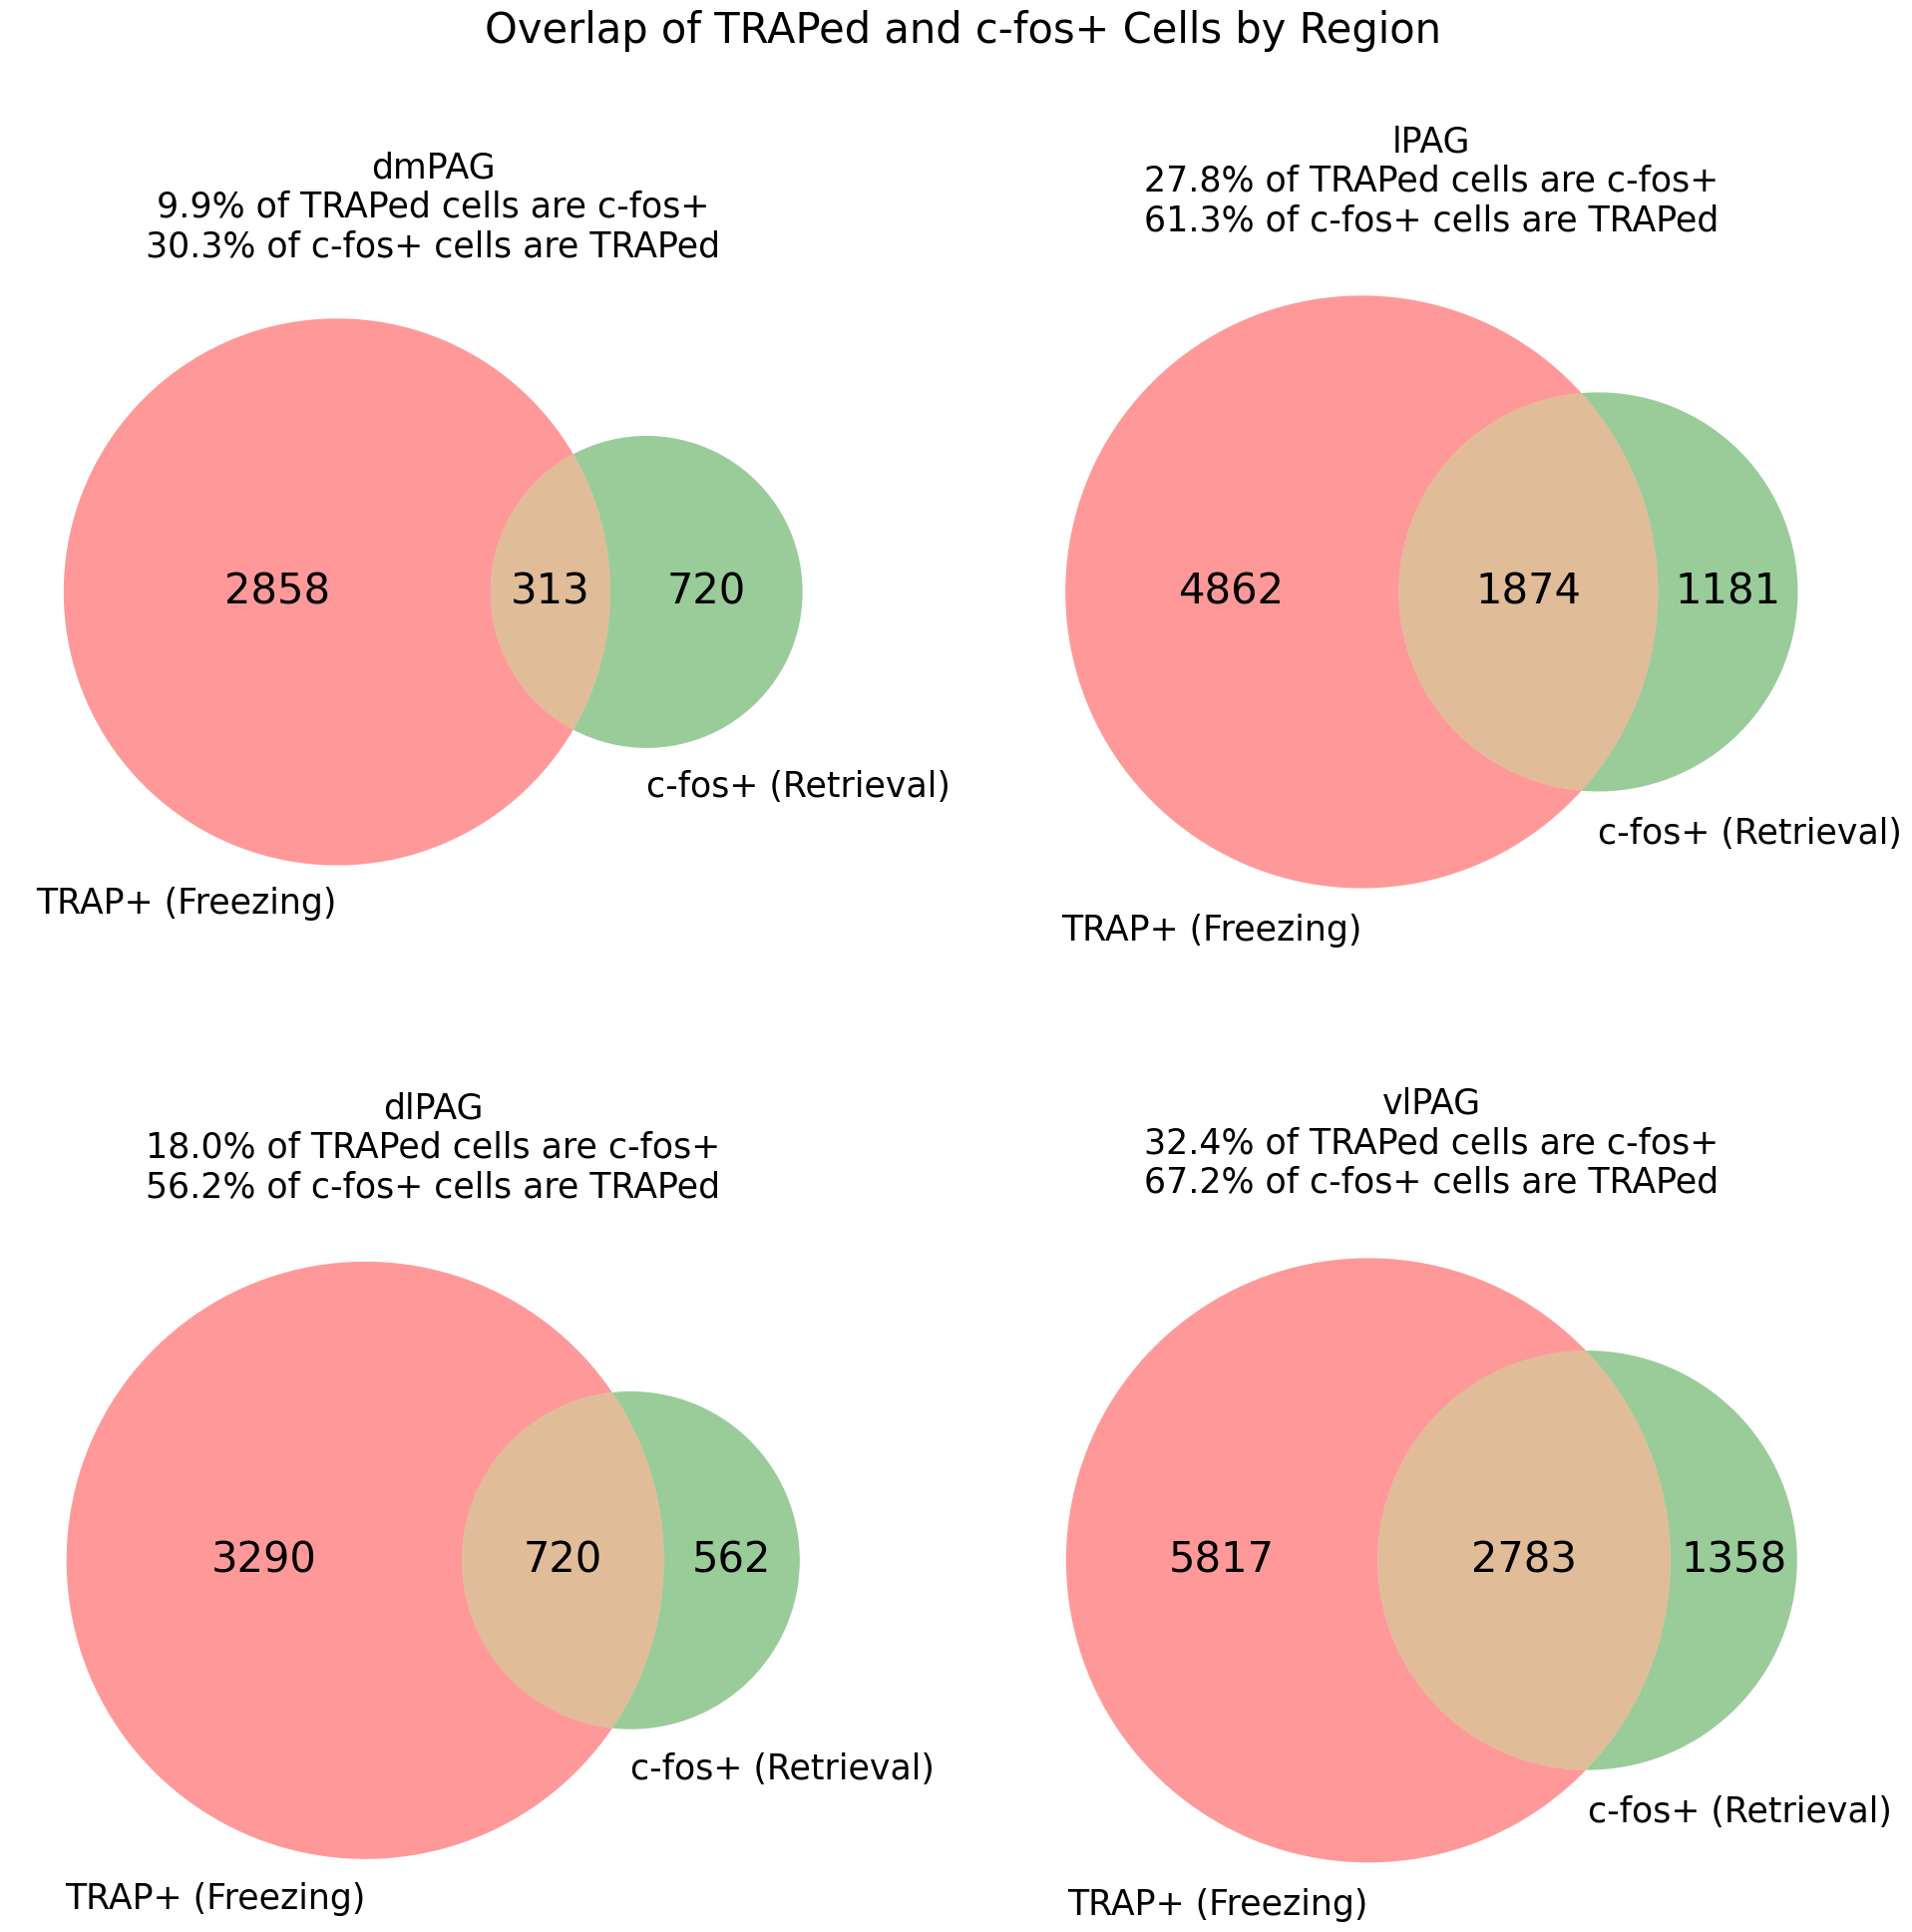

In [18]:
display(overlap)
overlap_combined = {
    'Region': ['dmPAG', 'dlPAG', 'lPAG', 'vlPAG']
}

for cell_type_dir in TRAP_cfos_pairs:
    if cell_type_dir in ['DAPIcells_alsoTRAPed', 'DAPIcells_alsoCfos']:
        dmPAG = overlap.loc['dmPAG', f'{cell_type_dir}_numerator']
        dlPAG = overlap.loc['dlPAG_l', f'{cell_type_dir}_numerator'] + overlap.loc['dlPAG_r', f'{cell_type_dir}_numerator']
        lPAG = overlap.loc['lPAG_l', f'{cell_type_dir}_numerator'] + overlap.loc['lPAG_r', f'{cell_type_dir}_numerator']
        vlPAG = overlap.loc['vlPAG_l', f'{cell_type_dir}_numerator'] + overlap.loc['vlPAG_r', f'{cell_type_dir}_numerator']
        overlap_combined[f'{cell_type_dir}_numerator'] = [dmPAG, dlPAG, lPAG, vlPAG]
    else: 
        dmPAG = overlap.loc['dmPAG', f'{cell_type_dir}_numerator']
        dlPAG = overlap.loc['dlPAG_l', f'{cell_type_dir}_numerator'] + overlap.loc['dlPAG_r', f'{cell_type_dir}_numerator']
        lPAG = overlap.loc['lPAG_l', f'{cell_type_dir}_numerator'] + overlap.loc['lPAG_r', f'{cell_type_dir}_numerator']
        vlPAG = overlap.loc['vlPAG_l', f'{cell_type_dir}_numerator'] + overlap.loc['vlPAG_r', f'{cell_type_dir}_numerator']
        overlap_combined[f'{cell_type_dir}_numerator'] = [dmPAG, dlPAG, lPAG, vlPAG]
        dmPAG = overlap.loc['dmPAG', f'{cell_type_dir}_denominator']
        dlPAG = overlap.loc['dlPAG_l', f'{cell_type_dir}_denominator'] + overlap.loc['dlPAG_r', f'{cell_type_dir}_denominator']
        lPAG = overlap.loc['lPAG_l', f'{cell_type_dir}_denominator'] + overlap.loc['lPAG_r', f'{cell_type_dir}_denominator']
        vlPAG = overlap.loc['vlPAG_l', f'{cell_type_dir}_denominator'] + overlap.loc['vlPAG_r', f'{cell_type_dir}_denominator']
        overlap_combined[f'{cell_type_dir}_denominator'] = [dmPAG, dlPAG, lPAG, vlPAG]
overlap_combined = pd.DataFrame.from_dict(overlap_combined)
overlap_combined['min_numerator'] = overlap_combined[['TRAPed_alsoCfos_numerator', 'Cfos_alsoTRAPed_numerator']].min(axis=1)

for cell_type_dir in ['TRAPed_alsoCfos', 'Cfos_alsoTRAPed']:
    overlap_combined[f'{cell_type_dir}_percent'] = overlap_combined['min_numerator'].div(overlap_combined[f'{cell_type_dir}_denominator'], axis=0) * 100
overlap_combined = overlap_combined.round(2)
display(overlap_combined) 
filepath = Path(f'{output_dir}/overlap_combined.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
overlap_combined.to_csv(filepath, index=False) 
   
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 20))  
axs = axs.T.flatten()
regions = ['dmPAG', 'dlPAG', 'lPAG', 'vlPAG']
for i, region in enumerate(regions):
    ax = axs[i]
    A = overlap_combined[overlap_combined['Region'] == region]['TRAPed_alsoCfos_denominator'].item()
    B = overlap_combined[overlap_combined['Region'] == region]['Cfos_alsoTRAPed_denominator'].item()
    overlap_amount = overlap_combined[overlap_combined['Region'] == region]['min_numerator'].item() # min(overlap_combined[overlap_combined['Region'] == region]['TRAPed_alsoCfos_numerator'].item(), overlap_combined[overlap_combined['Region'] == region]['Cfos_alsoTRAPed_numerator'].item())
    
    venn = venn2(
        subsets=(A - overlap_amount, B - overlap_amount, overlap_amount),
        set_labels=('TRAP+ (Freezing)', 'c-fos+ (Retrieval)'),
        ax=ax
    )
    for text in venn.subset_labels:
        text.set_fontsize(30)
    for text in venn.set_labels:
        text.set_fontsize(25)
    
    # Calculate % of cFos+ that are TRAPed
#     percent = (overlap_amount / B) * 100
    TRAP_percent = overlap_combined[overlap_combined['Region'] == region]['TRAPed_alsoCfos_percent'].item()
    cfos_percent = overlap_combined[overlap_combined['Region'] == region]['Cfos_alsoTRAPed_percent'].item()
    ax.set_title(f"{region}\n{TRAP_percent:.1f}% of TRAPed cells are c-fos+\n{cfos_percent:.1f}% of c-fos+ cells are TRAPed", fontsize=25)
    
plt.tight_layout()
plt.suptitle("Overlap of TRAPed and c-fos+ Cells by Region", fontsize=30, y=1.02)
plt.show()